In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import random
import time
import pickle
import sys
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sys.setrecursionlimit(50000)

In [11]:
#Loops through the years, scrapes Box Office Mojo & returns the result with True or Issue with False

all_movies_html = dict()

for year in range(2010,2020,1):
    all_movies_html[year] = scrape_movie_list_opening_weekend(year)
    time.sleep(.5+2*random.random())

In [24]:
all_movies_clean = dict()
all_errors_clean =dict()

for year in range(2010,2020,1):
    
    if all_movies_html[year][0]:

        movies_log = list()
        error_log = list() 
        counter = 1

        for table_row in all_movies_html[year][1]:

            if table_row.find('td'):

                table_row_data = table_row.find_all('td')
                movie_info_clean = HTML_table_row_to_dict(table_row_data)
                
                if type(movie_info_clean) == dict:
                    movies_log.append(movie_info_clean)

                else:
        #             (counter, movie_info_clean[2]['Title'],len(movie_info_clean[2]),list(movie_info_clean[2])[-1])
#                     print(movie_info_clean)
                    movie_info_clean[1]['Counter'] = counter
                    movie_info_clean[1]['Error Message'] = movie_info_clean[0]
                    error_log.append(movie_info_clean[1])
                counter += 1
                
        all_movies_clean[year] = movies_log
        all_errors_clean[year] = error_log


In [4]:
#convert to dataframe & save as csv

# df_list = pd.concat([pd.json_normalize(all_movies_clean[year]) for year in all_movies_clean],ignore_index=True)

# df_list.to_csv('Scraped_Cleaned_MoviesList_2010-19.csv',index=False)

df_movies = pd.read_csv('Scraped_Cleaned_MoviesList_2010-19.csv',parse_dates=[8])

#modifying the dataframe
new_column_names_list = ['Title ID','Running Length','Budget','MPAA','Genre','Franchise Ranking','Brand Ranking']
df_movies = df_movies.reindex(df_movies.columns.tolist() + new_column_names_list,axis=1)

,Release Link,Title,Domestic Gross,Max Theatres,Opening Weekend Gross,Domestic to Opening Gross,Opening Weekend Theatres,Release Date,Studio Link,Studio Name
0,https://www.boxofficemojo.com//release/rl15158...,Iron Man 2,312433331,4390,128122480,0.410,4380,May 7 2010,https://pro.imdb.com/company/co0023400/boxoffi...,Paramount Pictures
1,https://www.boxofficemojo.com//release/rl12485...,Harry Potter and the Deathly Hallows: Part 1,295983305,4125,125017372,0.422,4125,Nov 19 2010,https://pro.imdb.com/company/co0002663/boxoffi...,Warner Bros.
2,https://www.boxofficemojo.com//release/rl33932...,Alice in Wonderland,334191110,3739,116101023,0.347,3728,Mar 5 2010,https://pro.imdb.com/company/co0226183/boxoffi...,Walt Disney Studios Motion Pictures
3,https://www.boxofficemojo.com//release/rl13835...,Toy Story 3,415004880,4028,110307189,0.266,4028,Jun 18 2010,https://pro.imdb.com/company/co0226183/boxoffi...,Walt Disney Studios Motion Pictures
4,https://www.boxofficemojo.com//release/rl57771...,Shrek Forever After,238736787,4386,70838207,0.297,4359,May 21 2010,https://pro.imdb.com/company/co0040938/boxoffi...,DreamWorks


In [186]:
df_movies.head()

,Release Link,Title,Domestic Gross,Max Theatres,Opening Weekend Gross,Domestic to Opening Gross,Opening Weekend Theatres,Release Date,Studio Link,Studio Name,Title ID,Running Length,Budget,MPAA,Genre,Franchise Ranking,Brand Ranking
0,https://www.boxofficemojo.com//release/rl15158...,Iron Man 2,312433331,4390,128122480,0.410,4380,May 7 2010,https://pro.imdb.com/company/co0023400/boxoffi...,Paramount Pictures,tt1228705,124,200000000,[PG-13],"[Action, Adventure, Sci-Fi]",NaN,NaN
1,https://www.boxofficemojo.com//release/rl12485...,Harry Potter and the Deathly Hallows: Part 1,295983305,4125,125017372,0.422,4125,Nov 19 2010,https://pro.imdb.com/company/co0002663/boxoffi...,Warner Bros.,tt0926084,146,NaN,[PG-13],"[Adventure, Family, Fantasy, Mystery]",NaN,NaN
2,https://www.boxofficemojo.com//release/rl33932...,Alice in Wonderland,334191110,3739,116101023,0.347,3728,Mar 5 2010,https://pro.imdb.com/company/co0226183/boxoffi...,Walt Disney Studios Motion Pictures,tt1014759,108,200000000,[PG],"[Adventure, Family, Fantasy]",NaN,NaN
3,https://www.boxofficemojo.com//release/rl13835...,Toy Story 3,415004880,4028,110307189,0.266,4028,Jun 18 2010,https://pro.imdb.com/company/co0226183/boxoffi...,Walt Disney Studios Motion Pictures,tt0435761,103,200000000,NaN,"[Adventure, Animation, Comedy, Family, Fantasy]",NaN,NaN
4,https://www.boxofficemojo.com//release/rl57771...,Shrek Forever After,238736787,4386,70838207,0.297,4359,May 21 2010,https://pro.imdb.com/company/co0040938/boxoffi...,DreamWorks,tt0892791,93,165000000,[PG],"[Adventure, Animation, Comedy, Family, Fantasy...",NaN,NaN


In [ ]:
# write_to_pickle("Movies_list_HTML.pickle",all_movies_html)

In [4]:
def write_to_pickle(filename, var):
    """
    Write the given variable's contents to a pickle file with provided filename
    """
    
    with open(filename+".pickle",'wb') as to_write:
        pickle.dump(var,to_write)
        
def read_from_pickle(filename):
    """
    Read & return data from the given pickle filename
    """
    
    with open(filename+".pickle",'rb') as to_read:
        var = pickle.load(to_read)
    return var

In [5]:
def scrape_movie_list_opening_weekend(year):
    """
    Scrapes the list of movies present in a table format in Box Office Mojo
    Checks if the required table data was retrieved from the website
    Returns the parsed HTML text for the table portion
    
    Input: Year
    Output: Tuple containing True or False. 
            if True, returns table rows in HTML format containing movie list.
            if False, returns Error message or reason for False
    """
     
    url = "https://www.boxofficemojo.com/year/{}/?sort=openingWeekendGross&grossesOption=totalGrosses"

# Gets data from Box Office Mojo. Checks if status code is not 200. If not 200, returns status code & False
# If status code 200, parses the text & looks for table, table row & movie title in second row, to confirm
# formatting is similar. If not, returns the same, else errors out.

    try:
        response = requests.get(url.format(year))
        if response.status_code != 200:
            return (False, "For year {} Got status code: {}".format(year,response.status_code))
        
        else:
            soup = BeautifulSoup(response.text, 'html5lib')
            
            try:
                movie_title = soup.find('div', id='table').find('tbody').find_all('tr')[1].find_all('td')[1].text
                if movie_title:
                    return (True, soup.find('div', id='table').find('tbody').find_all('tr')[1:])
                else:
                    return (False, "No movie title in second <tr> row. Different HTML formatting")
            except Exception as error_message:
                return (False, "Retrieving table/movie title gave following exception: {}".format(error_message))
            
    except Exception as error_message:
        return (False, "Error Somewhere in entire block with message: {}".format(error_message))

def HTML_table_row_to_dict(table_row_data):
    """
    Takes in table_row_data for a single table row in HTML syntax for Box Office Mojo 
    and returns a dictionary with necessary values 
    """
    
    temp_dict = dict()
    try:

        temp_dict['Release Link'] = "https://www.boxofficemojo.com/"+table_row_data[1].find('a').get('href')
        temp_dict['Title'] = table_row_data[1].text
        temp_dict['Domestic Gross'] = currency_to_int(table_row_data[5].text)
        temp_dict['Max Theatres'] = table_row_data[6].text.strip().replace(',','')
        temp_dict['Opening Weekend Gross'] = currency_to_int(table_row_data[7].text)
        temp_dict['Domestic to Opening Gross'] = percent_to_float(table_row_data[8].text)
        temp_dict['Opening Weekend Theatres'] = table_row_data[9].text.strip().replace(',','')
        temp_dict['Release Date'] = table_row_data[10].text + " "+str(year)
        temp_dict['Studio Link'] = table_row_data[12].find('a').get('href')
        temp_dict['Studio Name'] = table_row_data[12].text.strip()
    except Exception as ex:
        return (ex, temp_dict)

    return temp_dict

In [4]:
def currency_to_int(amount):
    """
    Converts a given curreny string to an integer
    
    Input: amount --> '$123,562,324' or 'GBP54000'
    Output: Output --> 123562324 or 72900
    """
    try:
        if amount.startswith("GBP"):
            return int(int(amount.strip('GBP').replace(',',''))*1.5)
        elif amount.startswith("$"):
            return int(amount.strip('$').replace(',',''))
        else:
            return np.nan
    except :
        return np.nan

def percent_to_float(percentage):
    """
    Converts a given string percentage to float
    
    Input: 90.4%
    Ouput: 0.904
    """
    
    try:
        return float(percentage.strip('%-'))/100
    except:
        return np.nan

def runtime_to_minutes(runtimestring):
    """
    Take duration in string format & return in minute integer
    
    Input: 2 hrs 53 mins
    Output: 173
    """
    
    runtime = runtimestring.split()
    try:
        return int(int(runtime[0])*60 + int(runtime[2]))
    except:
        return np.nan

In [298]:
def scrape_release_links(url):
    """
    Function to scrape box office mojo's release page of a movie
    Confirm necessary information was retrieved & return HTML format page.
    
    Input: Release Link (url), that has to be queried
    Output: If successful, tuple containing (True,HTML Page)
            If not successful, tuple containing (False, Error message and if possible, the HTML page)
    """
    
    time.sleep(1+2*random.random())
    try: 
        
        response = requests.get(url)
        if response.status_code != 200:
            return (False,"Not able to get results from the page. Received status code {}" \
                    .format(response.status_code))
        
        else:
            soup_release = BeautifulSoup(response.text,'html5lib')
            
            try:
                summary_table = soup_release.find('div', class_='mojo-summary-values').find_all('div')
                assert len(summary_table) >= 1
                return (True,soup_release)
            except Exception as error_message:
                return (False,"Asserting summary table length gave following error: {}. \
                        \n Soup Results: \n {}".format(error_message,soup_release))
                
    except Exception as error_message:
        return (False,"Received error message from overall scraping. {}".format(error_message))
    
def clean_soup_release(soup_release):
    """
    Parse the HTML soup to return the Title ID, Budget, Running Time, MPAA Rating & Genre
    
    Input: HTML format page for Indivdiual Movies from Box Office Mojo
    Output: Tuple containing Title ID, Budget, Running Time, MPAA Rating & Genre
    """
    temp_movie_dict = dict()
    
    title = soup_release.find('h1', class_="a-size-extra-large").text    
    summary_table = soup_release.find('div', class_='mojo-summary-values')
    
    try:
        temp_movie_dict['title_id'] = soup_release.find('a', class_='mojo-title-link').get('href').split('/')[2]
    except Exception as error_message:
        print('Error getting title id for {}.\n. ERROR MESSAGE:'.format(title,error_message))
        temp_movie_dict['title_id'] = ''
        
    try:
        temp_movie_dict['Run Time'] = runtime_to_minutes(
                                      summary_table.find(text=re.compile("Running")).findNext().text)
    except Exception as error_message:
        print('Error getting Run Time for {}.\n. ERROR MESSAGE:'.format(title,error_message))
        temp_movie_dict['Run Time'] = np.nan
        
    try:        
        temp_movie_dict['Budget'] = currency_to_int(summary_table.find(text=re.compile("Budget")).findNext().text)
    except Exception as error_message:
        print('Error getting Budget for {}.\n. ERROR MESSAGE:'.format(title,error_message))
        temp_movie_dict['Budget'] = np.nan
        
    try:
        temp_movie_dict['MPAA'] = summary_table.find(text=re.compile("MPAA")).findNext().text.split()
    except Exception as error_message:
        print('Error getting MPAA for {}.\n. ERROR MESSAGE:'.format(title,error_message))
        temp_movie_dict['MPAA'] = np.nan
    
    try:
        temp_movie_dict['Genre'] = summary_table.find(text=re.compile("Genre")).findNext().text.split()
    except Exception as error_message:
        print('Error getting Genres for {}.\n. ERROR MESSAGE:'.format(title,error_message))
        temp_movie_dict['Genre'] = np.nan
    
    temp_movie_dict['Franchise Ranking'] = 1 if soup_release.find(text=re.compile("Franchise rankings")) else 0
    temp_movie_dict['Brand Ranking'] = 1 if soup_release.find(text=re.compile("Brand rankings")) else 0
    
    return temp_movie_dict


In [193]:
for row_index,row_series in df_movies.iloc[500:,:].iterrows():
    release_link = row_series['Release Link']
    
    soup_release = scrape_release_links(release_link)
    if soup_release[0]:
        movie_details = clean_soup_release(soup_release[1])
        
        print(row_series['Title'])
        print(movie_details)
        
        df_movies.loc[row_index, new_column_names_list] = movie_details.values()
        
    else:
        print("Error scraping the link or finding the table")
        print(soup_release[1])
        input()
    
    
    
    if row_index+1%25 == 0:
        df_movies.to_csv("Movies_listv2.csv",index=False)
        time.sleep(20+5*random.random())
        
df_movies.to_csv("Movies_listv2.csv",index=False)

Error getting Budget for Shake Hands with the Devil.
. ERROR MESSAGE:
Shake Hands with the Devil
{'title_id': 'tt0472562', 'Run Time': 112, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'History', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Two Escobars.
. ERROR MESSAGE:
Error getting MPAA for The Two Escobars.
. ERROR MESSAGE:
The Two Escobars
{'title_id': 'tt2700330', 'Run Time': 104, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Elvis on Tour.
. ERROR MESSAGE:
Error getting MPAA for Elvis on Tour.
. ERROR MESSAGE:
Elvis on Tour
{'title_id': 'tt0068537', 'Run Time': 93, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Christina.
. ERROR MESSAGE:
Error getting MPAA for Christina.
. ERROR MESSAGE:
Christina
{'title_id': 'tt1297921', 'Run Time': 90, 'Budget': nan, 'MPA

The Green Hornet
{'title_id': 'tt0990407', 'Run Time': 119, 'Budget': 120000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Comedy', 'Crime'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Immortals
{'title_id': 'tt1253864', 'Run Time': 110, 'Budget': 75000000, 'MPAA': ['R'], 'Genre': ['Action', 'Drama', 'Fantasy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Bad Teacher
{'title_id': 'tt1284575', 'Run Time': 92, 'Budget': 20000000, 'MPAA': ['R'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Just Go with It
{'title_id': 'tt1564367', 'Run Time': 117, 'Budget': 80000000, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Lion King2011 3D Release
{'title_id': 'tt0110357', 'Run Time': 88, 'Budget': 45000000, 'MPAA': ['G'], 'Genre': ['Adventure', 'Animation', 'Drama', 'Family', 'Musical'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting MPAA for Justin Bieber: Never Say Never.
. ERROR MESSAGE:
Just

Hall Pass
{'title_id': 'tt0480687', 'Run Time': 105, 'Budget': 36000000, 'MPAA': ['R'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Change-Up
{'title_id': 'tt1488555', 'Run Time': 112, 'Budget': 52000000, 'MPAA': ['R'], 'Genre': ['Comedy', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
30 Minutes or Less
{'title_id': 'tt1622547', 'Run Time': 83, 'Budget': 28000000, 'MPAA': ['R'], 'Genre': ['Action', 'Comedy', 'Crime'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Insidious
{'title_id': 'tt1591095', 'Run Time': 103, 'Budget': 1500000, 'MPAA': ['PG-13'], 'Genre': ['Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
The Lincoln Lawyer
{'title_id': 'tt1189340', 'Run Time': 118, 'Budget': 40000000, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Larry Crowne
{'title_id': 'tt1583420', 'Run Time': 98, 'Budget': 30000000, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'Rom

Monte Carlo
{'title_id': 'tt1067774', 'Run Time': 109, 'Budget': 20000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Comedy', 'Family', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Our Idiot Brother
{'title_id': 'tt1637706', 'Run Time': 90, 'Budget': 5000000, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Mars Needs Moms
{'title_id': 'tt1305591', 'Run Time': 88, 'Budget': 150000000, 'MPAA': ['PG'], 'Genre': ['Action', 'Adventure', 'Animation', 'Family', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Judy Moody and the Not Bummer Summer
{'title_id': 'tt1547230', 'Run Time': 93, 'Budget': 20000000, 'MPAA': ['PG'], 'Genre': ['Comedy', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for African Cats.
. ERROR MESSAGE:
Error getting MPAA for African Cats.
. ERROR MESSAGE:
African Cats
{'title_id': 'tt1223236', 'Run Time': 89, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Documentary'], 'Franchise Ran

Error getting Budget for Saving Private Perez.
. ERROR MESSAGE:
Saving Private Perez
{'title_id': 'tt0461336', 'Run Time': 105, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Adventure', 'Comedy', 'Western'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Company Men
{'title_id': 'tt1172991', 'Run Time': 104, 'Budget': 15000000, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Rockstar.
. ERROR MESSAGE:
Error getting MPAA for Rockstar.
. ERROR MESSAGE:
Rockstar
{'title_id': 'tt1839596', 'Run Time': 159, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Music', 'Musical', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Midnight in Paris
{'title_id': 'tt1605783', 'Run Time': 96, 'Budget': 17000000, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Fantasy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for It's Not You, It's Me.
. ERROR MESSAGE:
It's Not You, It's Me
{'title_id': 'tt1421046', 'Run Time': 101

Error getting Budget for Seven Sins Forgiven.
. ERROR MESSAGE:
Error getting MPAA for Seven Sins Forgiven.
. ERROR MESSAGE:
Seven Sins Forgiven
{'title_id': 'tt1629376', 'Run Time': 137, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Singham.
. ERROR MESSAGE:
Error getting MPAA for Singham.
. ERROR MESSAGE:
Singham
{'title_id': 'tt1948150', 'Run Time': 143, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Win Win.
. ERROR MESSAGE:
Win Win
{'title_id': 'tt1606392', 'Run Time': 106, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Kill the Irishman.
. ERROR MESSAGE:
Kill the Irishman
{'title_id': 'tt1416801', 'Run Time': 106, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranki

Error getting Budget for Red Lips.
. ERROR MESSAGE:
Red Lips
{'title_id': 'tt1206483', 'Run Time': 93, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Extremely Loud & Incredibly Close.
. ERROR MESSAGE:
Extremely Loud & Incredibly Close
{'title_id': 'tt0477302', 'Run Time': 129, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Adventure', 'Drama', 'Mystery'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Jig.
. ERROR MESSAGE:
Error getting MPAA for Jig.
. ERROR MESSAGE:
Jig
{'title_id': 'tt1748062', 'Run Time': 99, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Musical'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Turtle: The Incredible Journey.
. ERROR MESSAGE:
Turtle: The Incredible Journey
{'title_id': 'tt0970521', 'Run Time': 79, 'Budget': nan, 'MPAA': ['G'], 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Pina.
.

Error getting Budget for Submarine.
. ERROR MESSAGE:
Submarine
{'title_id': 'tt1440292', 'Run Time': 97, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Point Blank.
. ERROR MESSAGE:
Point Blank
{'title_id': 'tt1545759', 'Run Time': 84, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Hedgehog.
. ERROR MESSAGE:
Error getting MPAA for The Hedgehog.
. ERROR MESSAGE:
The Hedgehog
{'title_id': 'tt1442519', 'Run Time': 100, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Love U... Mr. Kalakaar!.
. ERROR MESSAGE:
Error getting MPAA for Love U... Mr. Kalakaar!.
. ERROR MESSAGE:
Love U... Mr. Kalakaar!
{'title_id': 'tt1695793', 'Run Time': 152, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand

Error getting Budget for Evil Bong 3: The Wrath of Bong.
. ERROR MESSAGE:
Evil Bong 3: The Wrath of Bong
{'title_id': 'tt1791500', 'Run Time': 87, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Horror', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for We Need to Talk About Kevin.
. ERROR MESSAGE:
We Need to Talk About Kevin
{'title_id': 'tt1242460', 'Run Time': 112, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for War of the Arrows.
. ERROR MESSAGE:
War of the Arrows
{'title_id': 'tt2025526', 'Run Time': 122, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'History', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for When Harry Tries to Marry.
. ERROR MESSAGE:
When Harry Tries to Marry
{'title_id': 'tt1535110', 'Run Time': 93, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 

Error getting Budget for My Kingdom.
. ERROR MESSAGE:
Error getting MPAA for My Kingdom.
. ERROR MESSAGE:
My Kingdom
{'title_id': 'tt1790669', 'Run Time': 108, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Evidence of a Haunting.
. ERROR MESSAGE:
Error getting MPAA for Evidence of a Haunting.
. ERROR MESSAGE:
Evidence of a Haunting
{'title_id': 'tt3502802', 'Run Time': 80, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Fantasy', 'Horror'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Hanyo.
. ERROR MESSAGE:
Error getting MPAA for Hanyo.
. ERROR MESSAGE:
Hanyo
{'title_id': 'tt1314652', 'Run Time': 107, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Muran.
. ERROR MESSAGE:
Error getting MPAA for Muran.
. ERROR MESSAGE:
Muran
{'title_id': 'tt2053397', 'Run Time': 103, 'Budget': nan, 'MPAA': na

Error getting Budget for Clash.
. ERROR MESSAGE:
Clash
{'title_id': 'tt1571565', 'Run Time': 90, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Hobo with a Shotgun.
. ERROR MESSAGE:
Error getting MPAA for Hobo with a Shotgun.
. ERROR MESSAGE:
Hobo with a Shotgun
{'title_id': 'tt1640459', 'Run Time': 86, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Comedy', 'Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Caesar and Otto's Summer Camp Massacre.
. ERROR MESSAGE:
Error getting MPAA for Caesar and Otto's Summer Camp Massacre.
. ERROR MESSAGE:
Caesar and Otto's Summer Camp Massacre
{'title_id': 'tt1196601', 'Run Time': 76, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Horror'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Jing wu feng yun: Chen Zhen.
. ERROR MESSAGE:
Jing wu feng yun: Chen Zhen
{'title_id': 'tt1456661', 'Run 

Error getting Budget for Cook County.
. ERROR MESSAGE:
Cook County
{'title_id': 'tt1147682', 'Run Time': 93, 'Budget': nan, 'MPAA': ['Not', 'Rated'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Margaret
{'title_id': 'tt0466893', 'Run Time': 150, 'Budget': 14000000, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Making the Boys.
. ERROR MESSAGE:
Error getting MPAA for Making the Boys.
. ERROR MESSAGE:
Making the Boys
{'title_id': 'tt1413493', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Perfect Host.
. ERROR MESSAGE:
The Perfect Host
{'title_id': 'tt1334553', 'Run Time': 93, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Crime', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Meet Monica Velour.
. ERROR MESSAGE:
Meet Monica Velour
{'title_id': 'tt1291549

Error getting Budget for The Look.
. ERROR MESSAGE:
Error getting MPAA for The Look.
. ERROR MESSAGE:
The Look
{'title_id': 'tt1922751', 'Run Time': 99, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Woodmans.
. ERROR MESSAGE:
Error getting MPAA for The Woodmans.
. ERROR MESSAGE:
The Woodmans
{'title_id': 'tt1610516', 'Run Time': 82, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for American: The Bill Hicks Story.
. ERROR MESSAGE:
Error getting MPAA for American: The Bill Hicks Story.
. ERROR MESSAGE:
American: The Bill Hicks Story
{'title_id': 'tt1179947', 'Run Time': 102, 'Budget': nan, 'MPAA': nan, 'Genre': ['Animation', 'Biography', 'Comedy', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Rapt.
. ERROR MESSAGE:
Error getting MPAA for Rapt.
. ERROR MESSAGE:
Rapt2011 Re-release
{'tit

Error getting Budget for Summer.
. ERROR MESSAGE:
Error getting MPAA for Summer.
. ERROR MESSAGE:
Summer2011 Re-release
{'title_id': 'tt0091830', 'Run Time': 99, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Putty Hill.
. ERROR MESSAGE:
Error getting MPAA for Putty Hill.
. ERROR MESSAGE:
Putty Hill
{'title_id': 'tt1530975', 'Run Time': 85, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Whale.
. ERROR MESSAGE:
Error getting MPAA for The Whale.
. ERROR MESSAGE:
The Whale
{'title_id': 'tt1708537', 'Run Time': 85, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for House of Tolerance.
. ERROR MESSAGE:
Error getting MPAA for House of Tolerance.
. ERROR MESSAGE:
House of Tolerance
{'title_id': 'tt1660379', 'Run Time': 122, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama']

Error getting Budget for The Heir Apparent: Largo Winch.
. ERROR MESSAGE:
Error getting MPAA for The Heir Apparent: Largo Winch.
. ERROR MESSAGE:
The Heir Apparent: Largo Winch2011 Re-release
{'title_id': 'tt0808339', 'Run Time': 108, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Adventure', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Zokkomon.
. ERROR MESSAGE:
Zokkomon
{'title_id': 'tt1605790', 'Run Time': 109, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Action', 'Adventure'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Small Town Murder Songs.
. ERROR MESSAGE:
Small Town Murder Songs
{'title_id': 'tt1429392', 'Run Time': 75, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Tanner Hall.
. ERROR MESSAGE:
Tanner Hall
{'title_id': 'tt1151410', 'Run Time': 96, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranki

Error getting Budget for The Sons of Tennessee Williams.
. ERROR MESSAGE:
Error getting MPAA for The Sons of Tennessee Williams.
. ERROR MESSAGE:
The Sons of Tennessee Williams
{'title_id': 'tt1621019', 'Run Time': 75, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Love, Wedding, Marriage.
. ERROR MESSAGE:
Love, Wedding, Marriage
{'title_id': 'tt1436559', 'Run Time': 90, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Sidewalls.
. ERROR MESSAGE:
Error getting MPAA for Sidewalls.
. ERROR MESSAGE:
Sidewalls
{'title_id': 'tt1235841', 'Run Time': 95, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Korkoro.
. ERROR MESSAGE:
Error getting MPAA for Korkoro.
. ERROR MESSAGE:
Korkoro
{'title_id': 'tt1495823', 'Run Time': 111, 'Budget': nan, 'MP

Error getting Budget for Littlerock.
. ERROR MESSAGE:
Error getting MPAA for Littlerock.
. ERROR MESSAGE:
Littlerock
{'title_id': 'tt1608285', 'Run Time': 83, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Lord of the Rings: The Return of the King2011 Re-release
{'title_id': 'tt0167260', 'Run Time': 201, 'Budget': 94000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Drama', 'Fantasy'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for To Catch a Dollar: Muhammad Yunus Banks on America.
. ERROR MESSAGE:
Error getting MPAA for To Catch a Dollar: Muhammad Yunus Banks on America.
. ERROR MESSAGE:
To Catch a Dollar: Muhammad Yunus Banks on America
{'title_id': 'tt1541943', 'Run Time': 74, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Inkubus.
. ERROR MESSAGE:
Inkubus
{'title_id': 'tt1650537', 'Run Time': 80, 'Budget'

The Bourne Legacy
{'title_id': 'tt1194173', 'Run Time': 135, 'Budget': 125000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
21 Jump Street
{'title_id': 'tt1232829', 'Run Time': 109, 'Budget': 42000000, 'MPAA': ['R'], 'Genre': ['Action', 'Comedy', 'Crime'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
The Devil Inside
{'title_id': 'tt1560985', 'Run Time': 83, 'Budget': 1000000, 'MPAA': ['R'], 'Genre': ['Horror'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Think Like a Man
{'title_id': 'tt1621045', 'Run Time': 123, 'Budget': 12000000, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Wrath of the Titans
{'title_id': 'tt1646987', 'Run Time': 99, 'Budget': 150000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
John Carter
{'title_id': 'tt0401729', 'Run Time': 132, 'Budget': 250000000, 'MPAA': ['PG-13'], 'Genre': ['Ac

Abraham Lincoln: Vampire Hunter
{'title_id': 'tt1611224', 'Run Time': 105, 'Budget': 69000000, 'MPAA': ['R'], 'Genre': ['Action', 'Fantasy', 'Horror', 'Western'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Savages
{'title_id': 'tt1615065', 'Run Time': 131, 'Budget': 45000000, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Tyler Perry's Good Deeds.
. ERROR MESSAGE:
Tyler Perry's Good Deeds
{'title_id': 'tt1885265', 'Run Time': 129, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Jack Reacher
{'title_id': 'tt0790724', 'Run Time': 130, 'Budget': 60000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for The Cabin in the Woods.
. ERROR MESSAGE:
The Cabin in the Woods
{'title_id': 'tt1259521', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror'], 'Franchise Ra

Error getting Budget for Wanderlust.
. ERROR MESSAGE:
Wanderlust
{'title_id': 'tt1655460', 'Run Time': 98, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Secret World of Arrietty.
. ERROR MESSAGE:
Error getting MPAA for The Secret World of Arrietty.
. ERROR MESSAGE:
The Secret World of Arrietty
{'title_id': 'tt1568921', 'Run Time': 94, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Animation', 'Family', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Dredd
{'title_id': 'tt1343727', 'Run Time': 95, 'Budget': 50000000, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Lockout
{'title_id': 'tt1592525', 'Run Time': 95, 'Budget': 20000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
A Thousand Words
{'title_id': 'tt0763831', 'Run Time': 91, 'Budget': 40000000, 'MPAA': ['PG-13'], 'Ge

Error getting Budget for Barfi!.
. ERROR MESSAGE:
Error getting MPAA for Barfi!.
. ERROR MESSAGE:
Barfi!
{'title_id': 'tt2082197', 'Run Time': 151, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Fearless 2.
. ERROR MESSAGE:
Error getting MPAA for Fearless 2.
. ERROR MESSAGE:
Fearless 2
{'title_id': 'tt2112131', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Lincoln
{'title_id': 'tt0443272', 'Run Time': 150, 'Budget': 65000000, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Drama', 'History', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Jeff, Who Lives at Home.
. ERROR MESSAGE:
Jeff, Who Lives at Home
{'title_id': 'tt1588334', 'Run Time': 83, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Housefull 2.
. ERROR MESSAGE:

Error getting Budget for Branded.
. ERROR MESSAGE:
Branded
{'title_id': 'tt1368440', 'Run Time': 106, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Fantasy', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Khiladi 786.
. ERROR MESSAGE:
Error getting MPAA for Khiladi 786.
. ERROR MESSAGE:
Khiladi 786
{'title_id': 'tt2166214', 'Run Time': 141, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Perks of Being a Wallflower.
. ERROR MESSAGE:
The Perks of Being a Wallflower
{'title_id': 'tt1659337', 'Run Time': 103, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Salmon Fishing in the Yemen.
. ERROR MESSAGE:
Salmon Fishing in the Yemen
{'title_id': 'tt1441952', 'Run Time': 107, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Bran

Error getting Budget for Chakravyuh.
. ERROR MESSAGE:
Error getting MPAA for Chakravyuh.
. ERROR MESSAGE:
Chakravyuh
{'title_id': 'tt2292625', 'Run Time': 152, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Safety Not Guaranteed.
. ERROR MESSAGE:
Safety Not Guaranteed
{'title_id': 'tt1862079', 'Run Time': 86, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Awakening.
. ERROR MESSAGE:
The Awakening
{'title_id': 'tt1687901', 'Run Time': 102, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Luv Shuv Tey Chicken Khurana.
. ERROR MESSAGE:
Error getting MPAA for Luv Shuv Tey Chicken Khurana.
. ERROR MESSAGE:
Luv Shuv Tey Chicken Khurana
{'title_id': 'tt2186933', 'Run Time': 140, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy']

Error getting Budget for The Road.
. ERROR MESSAGE:
The Road
{'title_id': 'tt2063008', 'Run Time': 110, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Keep the Lights On.
. ERROR MESSAGE:
Error getting MPAA for Keep the Lights On.
. ERROR MESSAGE:
Keep the Lights On
{'title_id': 'tt2011953', 'Run Time': 101, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Mugamoodi.
. ERROR MESSAGE:
Error getting MPAA for Mugamoodi.
. ERROR MESSAGE:
Mugamoodi
{'title_id': 'tt2367996', 'Run Time': 150, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Adventure'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Cowgirls 'n Angels.
. ERROR MESSAGE:
Cowgirls 'n Angels
{'title_id': 'tt1894561', 'Run Time': 92, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Drama', 'Family'], 'Franchise Ranking': 0, 

Error getting Run Time for Hysteria.
. ERROR MESSAGE:
Error getting Budget for Hysteria.
. ERROR MESSAGE:
Error getting MPAA for Hysteria.
. ERROR MESSAGE:
Hysteria
{'title_id': 'tt1064958', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Robot & Frank.
. ERROR MESSAGE:
Robot & Frank
{'title_id': 'tt1990314', 'Run Time': 89, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Crime', 'Drama', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for A Cat in Paris.
. ERROR MESSAGE:
A Cat in Paris
{'title_id': 'tt1673702', 'Run Time': 70, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Crime', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Undefeated.
. ERROR MESSAGE:
Undefeated
{'title_id': 'tt1860355', 'Run Time': 113, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Documentary', 'Sport'], 'Franchise Ranking': 0, 

Error getting Budget for Hello I Must Be Going.
. ERROR MESSAGE:
Hello I Must Be Going
{'title_id': 'tt2063666', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for All's Well, Ends Well 2012.
. ERROR MESSAGE:
Error getting MPAA for All's Well, Ends Well 2012.
. ERROR MESSAGE:
All's Well, Ends Well 2012
{'title_id': 'tt2051818', 'Run Time': 115, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Backwards.
. ERROR MESSAGE:
Backwards
{'title_id': 'tt2005153', 'Run Time': 89, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Romance', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for 10 Years.
. ERROR MESSAGE:
10 Years
{'title_id': 'tt1715873', 'Run Time': 110, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget 

Error getting Budget for The First Time.
. ERROR MESSAGE:
The First Time
{'title_id': 'tt1763303', 'Run Time': 95, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Polisse.
. ERROR MESSAGE:
Error getting MPAA for Polisse.
. ERROR MESSAGE:
Polisse
{'title_id': 'tt1661420', 'Run Time': 127, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Invisible War.
. ERROR MESSAGE:
Error getting MPAA for The Invisible War.
. ERROR MESSAGE:
The Invisible War
{'title_id': 'tt2120152', 'Run Time': 93, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The House I Live In.
. ERROR MESSAGE:
Error getting MPAA for The House I Live In.
. ERROR MESSAGE:
The House I Live In
{'title_id': 'tt2125653', 'Run Time': 108, 'Budget': nan, 'MPAA': nan, 'Genre': ['D

Error getting Budget for Dragon.
. ERROR MESSAGE:
Dragon2012 Re-release
{'title_id': 'tt1718199', 'Run Time': 115, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Marina Abramovic: The Artist Is Present.
. ERROR MESSAGE:
Error getting MPAA for Marina Abramovic: The Artist Is Present.
. ERROR MESSAGE:
Marina Abramovic: The Artist Is Present
{'title_id': 'tt2073029', 'Run Time': 106, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Once Upon a Time in Anatolia.
. ERROR MESSAGE:
Error getting MPAA for Once Upon a Time in Anatolia.
. ERROR MESSAGE:
Once Upon a Time in Anatolia
{'title_id': 'tt1827487', 'Run Time': 157, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Hara-Kiri: Death of a Samurai.
. ERROR MESSAGE:
Err

Error getting Budget for 30 Beats.
. ERROR MESSAGE:
30 Beats
{'title_id': 'tt1484521', 'Run Time': 88, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Supercapitalist.
. ERROR MESSAGE:
Error getting MPAA for Supercapitalist.
. ERROR MESSAGE:
Supercapitalist
{'title_id': 'tt1734586', 'Run Time': 102, 'Budget': nan, 'MPAA': nan, 'Genre': ['Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for 4:44 Last Day on Earth.
. ERROR MESSAGE:
4:44 Last Day on Earth
{'title_id': 'tt1707391', 'Run Time': 82, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Fantasy', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Jesus Henry Christ.
. ERROR MESSAGE:
Jesus Henry Christ
{'title_id': 'tt1393742', 'Run Time': 92, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Crazy Horse.
. ERROR MESSAGE

Error getting Budget for The Comedy.
. ERROR MESSAGE:
Error getting MPAA for The Comedy.
. ERROR MESSAGE:
The Comedy
{'title_id': 'tt2112293', 'Run Time': 95, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Las Acacias.
. ERROR MESSAGE:
Error getting MPAA for Las Acacias.
. ERROR MESSAGE:
Las Acacias
{'title_id': 'tt1754078', 'Run Time': 82, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for American Animal.
. ERROR MESSAGE:
American Animal
{'title_id': 'tt1670932', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Sound of Noise.
. ERROR MESSAGE:
Sound of Noise
{'title_id': 'tt1278449', 'Run Time': 102, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Crime', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Radio Unna

Error getting Budget for Newlyweds.
. ERROR MESSAGE:
Error getting MPAA for Newlyweds.
. ERROR MESSAGE:
Newlyweds
{'title_id': 'tt1880418', 'Run Time': 95, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Little Birds.
. ERROR MESSAGE:
Little Birds
{'title_id': 'tt1623745', 'Run Time': 94, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for You've Been Trumped.
. ERROR MESSAGE:
Error getting MPAA for You've Been Trumped.
. ERROR MESSAGE:
You've Been Trumped
{'title_id': 'tt1943873', 'Run Time': 79, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for North Sea Texas.
. ERROR MESSAGE:
Error getting MPAA for North Sea Texas.
. ERROR MESSAGE:
North Sea Texas2012 Re-release
{'title_id': 'tt1625150', 'Run Time': 98, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Fran

Error getting Budget for Keyhole.
. ERROR MESSAGE:
Keyhole
{'title_id': 'tt1674775', 'Run Time': 94, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Crazy Eyes.
. ERROR MESSAGE:
Error getting MPAA for Crazy Eyes.
. ERROR MESSAGE:
Crazy Eyes
{'title_id': 'tt1663631', 'Run Time': 95, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Miners' Hymns.
. ERROR MESSAGE:
Error getting MPAA for The Miners' Hymns.
. ERROR MESSAGE:
The Miners' Hymns
{'title_id': 'tt1655446', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for In Another Country.
. ERROR MESSAGE:
Error getting MPAA for In Another Country.
. ERROR MESSAGE:
In Another Country
{'title_id': 'tt1989712', 'Run Time': 89, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0

Error getting Budget for The Revisionaries.
. ERROR MESSAGE:
Error getting MPAA for The Revisionaries.
. ERROR MESSAGE:
The Revisionaries
{'title_id': 'tt2091398', 'Run Time': 92, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'History', 'News'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for After the Wizard.
. ERROR MESSAGE:
Error getting MPAA for After the Wizard.
. ERROR MESSAGE:
After the Wizard
{'title_id': 'tt1988544', 'Run Time': 80, 'Budget': nan, 'MPAA': nan, 'Genre': ['Family', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Booker's Place: A Mississippi Story.
. ERROR MESSAGE:
Error getting MPAA for Booker's Place: A Mississippi Story.
. ERROR MESSAGE:
Booker's Place: A Mississippi Story
{'title_id': 'tt2129930', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'History', 'Mystery', 'News'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Post Mortem.
. ERROR MESSAGE:
Error

Error getting Budget for Now, Forager.
. ERROR MESSAGE:
Error getting MPAA for Now, Forager.
. ERROR MESSAGE:
Now, Forager
{'title_id': 'tt1961447', 'Run Time': 93, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Putin's Kiss.
. ERROR MESSAGE:
Error getting MPAA for Putin's Kiss.
. ERROR MESSAGE:
Putin's Kiss
{'title_id': 'tt2094920', 'Run Time': 85, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Gregory Crewdson: Brief Encounters.
. ERROR MESSAGE:
Error getting MPAA for Gregory Crewdson: Brief Encounters.
. ERROR MESSAGE:
Gregory Crewdson: Brief Encounters
{'title_id': 'tt2281267', 'Run Time': 78, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Beat Hotel.
. ERROR MESSAGE:
Error getting MPAA for The Beat Hotel.
. ERROR MESSAGE:
The Be

Error getting Budget for Nature Calls.
. ERROR MESSAGE:
Nature Calls
{'title_id': 'tt1493157', 'Run Time': 79, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Night Watchman.
. ERROR MESSAGE:
Error getting MPAA for The Night Watchman.
. ERROR MESSAGE:
The Night Watchman
{'title_id': 'tt1916670', 'Run Time': 72, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Death of a Superhero.
. ERROR MESSAGE:
Error getting MPAA for Death of a Superhero.
. ERROR MESSAGE:
Death of a Superhero
{'title_id': 'tt1384927', 'Run Time': 97, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Take Me Home.
. ERROR MESSAGE:
Take Me Home
{'title_id': 'tt1261954', 'Run Time': 97, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getti

Iron Man 3
{'title_id': 'tt1300854', 'Run Time': 130, 'Budget': 200000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
The Hunger Games: Catching Fire
{'title_id': 'tt1951264', 'Run Time': 146, 'Budget': 130000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Mystery', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Man of Steel
{'title_id': 'tt0770828', 'Run Time': 143, 'Budget': 225000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Fast & Furious 6
{'title_id': 'tt1905041', 'Run Time': 130, 'Budget': 160000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Thor: The Dark World
{'title_id': 'tt1981115', 'Run Time': 112, 'Budget': 170000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Fantasy'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Despicable Me 2
{'title_i

A Good Day to Die Hard
{'title_id': 'tt1606378', 'Run Time': 98, 'Budget': 92000000, 'MPAA': ['R'], 'Genre': ['Action', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Lee Daniels' The Butler
{'title_id': 'tt1327773', 'Run Time': 132, 'Budget': 30000000, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Planes
{'title_id': 'tt1691917', 'Run Time': 91, 'Budget': 50000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Error getting Budget for Texas Chainsaw.
. ERROR MESSAGE:
Texas Chainsaw
{'title_id': 'tt1572315', 'Run Time': 92, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for Temptation: Confessions of a Marriage Counselor.
. ERROR MESSAGE:
Temptation: Confessions of a Marriage Counselor
{'title_id': 'tt2070862', 'Run Time': 111, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama

The World's End
{'title_id': 'tt1213663', 'Run Time': 109, 'Budget': 20000000, 'MPAA': ['R'], 'Genre': ['Comedy', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
21 & Over
{'title_id': 'tt1711425', 'Run Time': 93, 'Budget': 13000000, 'MPAA': ['R'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Don Jon
{'title_id': 'tt2229499', 'Run Time': 90, 'Budget': 3000000, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Broken City
{'title_id': 'tt1235522', 'Run Time': 109, 'Budget': 35000000, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Delivery Man
{'title_id': 'tt2387559', 'Run Time': 105, 'Budget': 26000000, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Instructions Not Included.
. ERROR MESSAGE:
Instructions Not Included
{'title_id': 'tt2378281', 'Run Time': 115, 'Budget': nan, 'MP

Filly Brown
{'title_id': 'tt1869425', 'Run Time': 80, 'Budget': 2000000, 'MPAA': ['R'], 'Genre': ['Drama', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for RamLeela.
. ERROR MESSAGE:
Error getting MPAA for RamLeela.
. ERROR MESSAGE:
RamLeela
{'title_id': 'tt2215477', 'Run Time': 150, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Musical', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for About Time.
. ERROR MESSAGE:
About Time
{'title_id': 'tt2194499', 'Run Time': 123, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Krrish 3.
. ERROR MESSAGE:
Error getting MPAA for Krrish 3.
. ERROR MESSAGE:
Krrish 3
{'title_id': 'tt1029231', 'Run Time': 152, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Emperor.
. ERROR MESSAGE:
Emperor
{'title_id'

Error getting Budget for The Inevitable Defeat of Mister & Pete.
. ERROR MESSAGE:
The Inevitable Defeat of Mister & Pete
{'title_id': 'tt2113075', 'Run Time': 108, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Before Midnight.
. ERROR MESSAGE:
Before Midnight
{'title_id': 'tt2209418', 'Run Time': 109, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for Generation Iron.
. ERROR MESSAGE:
Generation Iron
{'title_id': 'tt2205904', 'Run Time': 106, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Documentary', 'Drama', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Frozen
{'title_id': 'tt2294629', 'Run Time': 102, 'Budget': 150000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Musical'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Error getting Budget for Enough Said.
. ERROR MESSAGE:
Enough Said
{'

Error getting Budget for Disconnect.
. ERROR MESSAGE:
Disconnect
{'title_id': 'tt1433811', 'Run Time': 115, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for To the Wonder.
. ERROR MESSAGE:
To the Wonder
{'title_id': 'tt1595656', 'Run Time': 112, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Arthur Newman.
. ERROR MESSAGE:
Arthur Newman
{'title_id': 'tt1930546', 'Run Time': 93, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Personal Tailor.
. ERROR MESSAGE:
Error getting MPAA for Personal Tailor.
. ERROR MESSAGE:
Personal Tailor
{'title_id': 'tt2992152', 'Run Time': 118, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Book Thief.
. ERROR MESSAGE:
The Book Thief
{'title_id

Error getting Budget for Man of Tai Chi.
. ERROR MESSAGE:
Man of Tai Chi
{'title_id': 'tt2016940', 'Run Time': 105, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Fill the Void.
. ERROR MESSAGE:
Fill the Void
{'title_id': 'tt2219514', 'Run Time': 90, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Kings of Summer.
. ERROR MESSAGE:
The Kings of Summer
{'title_id': 'tt2179116', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Adventure', 'Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for From Up on Poppy Hill.
. ERROR MESSAGE:
From Up on Poppy Hill
{'title_id': 'tt1798188', 'Run Time': 91, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Animation', 'Drama', 'Family', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for Short Term 12.
. ERROR MESSAGE:
Shor

Error getting Budget for Seasons of Gray.
. ERROR MESSAGE:
Seasons of Gray
{'title_id': 'tt1710469', 'Run Time': 90, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Invisible Woman.
. ERROR MESSAGE:
The Invisible Woman
{'title_id': 'tt1700845', 'Run Time': 111, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Drama', 'History', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Is the Man Who Is Tall Happy?.
. ERROR MESSAGE:
Error getting MPAA for Is the Man Who Is Tall Happy?.
. ERROR MESSAGE:
Is the Man Who Is Tall Happy?
{'title_id': 'tt1817287', 'Run Time': 88, 'Budget': nan, 'MPAA': nan, 'Genre': ['Animation', 'Biography', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Table No. 21.
. ERROR MESSAGE:
Error getting MPAA for Table No. 21.
. ERROR MESSAGE:
Table No. 21
{'title_id': 'tt2229842', 'Run Time': 108, 'Budget': nan, 'MPAA': n

Error getting Budget for Capital.
. ERROR MESSAGE:
Capital
{'title_id': 'tt1951166', 'Run Time': 114, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Europa Report.
. ERROR MESSAGE:
Europa Report
{'title_id': 'tt2051879', 'Run Time': 97, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Kon-Tiki.
. ERROR MESSAGE:
Kon-Tiki
{'title_id': 'tt1613750', 'Run Time': 118, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Adventure', 'Biography', 'Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for 56 Up.
. ERROR MESSAGE:
Error getting MPAA for 56 Up.
. ERROR MESSAGE:
56 Up
{'title_id': 'tt2147134', 'Run Time': 144, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Like Someone in Love.
. ERROR MESSAGE:
Error getting 

Error getting Budget for It's a Disaster.
. ERROR MESSAGE:
It's a Disaster
{'title_id': 'tt1995341', 'Run Time': 88, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for You Will Be My Son.
. ERROR MESSAGE:
You Will Be My Son2012 Re-release
{'title_id': 'tt1754795', 'Run Time': 102, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for GMO OMG.
. ERROR MESSAGE:
Error getting MPAA for GMO OMG.
. ERROR MESSAGE:
GMO OMG
{'title_id': 'tt2461034', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Big Star: Nothing Can Hurt Me.
. ERROR MESSAGE:
Big Star: Nothing Can Hurt Me
{'title_id': 'tt2290151', 'Run Time': 113, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Documentary', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Tw

Error getting Budget for Shadow Dancer.
. ERROR MESSAGE:
Shadow Dancer
{'title_id': 'tt1770734', 'Run Time': 101, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Lovely Month of May.
. ERROR MESSAGE:
Error getting MPAA for The Lovely Month of May.
. ERROR MESSAGE:
The Lovely Month of May
{'title_id': 'tt0057202', 'Run Time': 165, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Happy People: A Year in the Taiga.
. ERROR MESSAGE:
Error getting MPAA for Happy People: A Year in the Taiga.
. ERROR MESSAGE:
Happy People: A Year in the Taiga
{'title_id': 'tt1683876', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Shanghai Calling.
. ERROR MESSAGE:
Shanghai Calling
{'title_id': 'tt2070597', 'Run Time': 100, 'Budget': nan, 'MPAA': ['PG-13'], 'Ge

Error getting Budget for Murder Eleven.
. ERROR MESSAGE:
Error getting MPAA for Murder Eleven.
. ERROR MESSAGE:
Murder Eleven
{'title_id': 'tt2130136', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Silence.
. ERROR MESSAGE:
Error getting MPAA for The Silence.
. ERROR MESSAGE:
The Silence2012 Re-release
{'title_id': 'tt1361835', 'Run Time': 118, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Andre Gregory: Before and After Dinner.
. ERROR MESSAGE:
Error getting MPAA for Andre Gregory: Before and After Dinner.
. ERROR MESSAGE:
Andre Gregory: Before and After Dinner
{'title_id': 'tt2235248', 'Run Time': 108, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Drama', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Charlie Countryman.
. ERROR

Error getting Budget for Herb & Dorothy 50X50.
. ERROR MESSAGE:
Error getting MPAA for Herb & Dorothy 50X50.
. ERROR MESSAGE:
Herb & Dorothy 50X50
{'title_id': 'tt2539720', 'Run Time': 87, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'News'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for M.
. ERROR MESSAGE:
Error getting MPAA for M.
. ERROR MESSAGE:
M2013 Re-release
{'title_id': 'tt0022100', 'Run Time': 117, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Girls Against Boys.
. ERROR MESSAGE:
Girls Against Boys
{'title_id': 'tt2036376', 'Run Time': 93, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Viola.
. ERROR MESSAGE:
Error getting MPAA for Viola.
. ERROR MESSAGE:
Viola
{'title_id': 'tt2379418', 'Run Time': 65, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama']

Error getting Budget for So Young.
. ERROR MESSAGE:
Error getting MPAA for So Young.
. ERROR MESSAGE:
So Young
{'title_id': 'tt2765340', 'Run Time': 131, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Nostalgia.
. ERROR MESSAGE:
Error getting MPAA for Nostalgia.
. ERROR MESSAGE:
Nostalgia
{'title_id': 'tt0086022', 'Run Time': 125, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Let the Fire Burn.
. ERROR MESSAGE:
Error getting MPAA for Let the Fire Burn.
. ERROR MESSAGE:
Let the Fire Burn
{'title_id': 'tt2119463', 'Run Time': 88, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for More Than Honey.
. ERROR MESSAGE:
Error getting MPAA for More Than Honey.
. ERROR MESSAGE:
More Than Honey
{'title_id': 'tt2263058', 'Run Time': 95, 'Budget': nan, 'MPAA': nan, 'Genre': ['Doc

Error getting Budget for Antoine and Antoinette.
. ERROR MESSAGE:
Error getting MPAA for Antoine and Antoinette.
. ERROR MESSAGE:
Antoine and Antoinette
{'title_id': 'tt0039155', 'Run Time': 78, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Zaytoun.
. ERROR MESSAGE:
Error getting MPAA for Zaytoun.
. ERROR MESSAGE:
Zaytoun
{'title_id': 'tt2131698', 'Run Time': 110, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Drama', 'Thriller', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Weekend of a Champion.
. ERROR MESSAGE:
Error getting MPAA for Weekend of a Champion.
. ERROR MESSAGE:
Weekend of a Champion
{'title_id': 'tt3504226', 'Run Time': 93, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Approved for Adoption.
. ERROR MESSAGE:
Error getting MPAA for Approved for Adoption.
. ERROR MESSAGE:
Approved f

Error getting Budget for The Trials of Muhammad Ali.
. ERROR MESSAGE:
Error getting MPAA for The Trials of Muhammad Ali.
. ERROR MESSAGE:
The Trials of Muhammad Ali
{'title_id': 'tt2489734', 'Run Time': 86, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Sport', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Informant.
. ERROR MESSAGE:
Error getting MPAA for Informant.
. ERROR MESSAGE:
Informant
{'title_id': 'tt2294679', 'Run Time': 81, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Morning.
. ERROR MESSAGE:
Morning
{'title_id': 'tt1320103', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Last Time I Saw Macao.
. ERROR MESSAGE:
Error getting MPAA for The Last Time I Saw Macao.
. ERROR MESSAGE:
The Last Time I Saw Macao
{'title_id': 'tt1843840', 'Run Time': 82, 'Budget': nan

Error getting Budget for Tricked.
. ERROR MESSAGE:
Error getting MPAA for Tricked.
. ERROR MESSAGE:
Tricked
{'title_id': 'tt2171875', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Happy Poet.
. ERROR MESSAGE:
Error getting MPAA for The Happy Poet.
. ERROR MESSAGE:
The Happy Poet
{'title_id': 'tt1605765', 'Run Time': 85, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Stroller Strategy.
. ERROR MESSAGE:
Error getting MPAA for The Stroller Strategy.
. ERROR MESSAGE:
The Stroller Strategy
{'title_id': 'tt2520516', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Three Worlds.
. ERROR MESSAGE:
Error getting MPAA for Three Worlds.
. ERROR MESSAGE:
Three Worlds
{'title_id': 'tt2369497', 'Run Time': 101, '

Error getting Budget for Almost in Love.
. ERROR MESSAGE:
Error getting MPAA for Almost in Love.
. ERROR MESSAGE:
Almost in Love
{'title_id': 'tt1622563', 'Run Time': 81, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Package.
. ERROR MESSAGE:
The Package
{'title_id': 'tt1884457', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Officer Down.
. ERROR MESSAGE:
Officer Down
{'title_id': 'tt1925479', 'Run Time': 98, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Khumba.
. ERROR MESSAGE:
Error getting MPAA for Khumba.
. ERROR MESSAGE:
Khumba
{'title_id': 'tt1487931', 'Run Time': 85, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Animation', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error ge

Error getting MPAA for The Polar Express.
. ERROR MESSAGE:
The Polar Express2013 IMAX Release
{'title_id': 'tt0338348', 'Run Time': 100, 'Budget': 165000000, 'MPAA': nan, 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Musical'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Berlin File.
. ERROR MESSAGE:
Error getting MPAA for The Berlin File.
. ERROR MESSAGE:
The Berlin File
{'title_id': 'tt2357377', 'Run Time': 121, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Still Mine.
. ERROR MESSAGE:
Still Mine
{'title_id': 'tt2073086', 'Run Time': 102, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Time Being.
. ERROR MESSAGE:
Error getting MPAA for The Time Being.
. ERROR MESSAGE:
The Time Being
{'title_id': 'tt1916749', 'Run Time': 85, 'Budget': nan, 'MPAA': nan, 'Genre': ['Mystery'],

The Hunger Games: Mockingjay - Part 1
{'title_id': 'tt1951265', 'Run Time': 123, 'Budget': 125000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Transformers: Age of Extinction
{'title_id': 'tt2109248', 'Run Time': 165, 'Budget': 210000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Captain America: The Winter Soldier
{'title_id': 'tt1843866', 'Run Time': 136, 'Budget': 170000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Guardians of the Galaxy
{'title_id': 'tt2015381', 'Run Time': 121, 'Budget': 170000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Comedy', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Godzilla
{'title_id': 'tt0831387', 'Run Time': 123, 'Budget': 160000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Sci-Fi', 'Thriller'], 'Fra

Exodus: Gods and Kings
{'title_id': 'tt1528100', 'Run Time': 150, 'Budget': 140000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Drama', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Fury
{'title_id': 'tt2713180', 'Run Time': 134, 'Budget': 68000000, 'MPAA': ['R'], 'Genre': ['Action', 'Drama', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Dracula Untold
{'title_id': 'tt0829150', 'Run Time': 92, 'Budget': 70000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Drama', 'Fantasy', 'Horror', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Heaven Is for Real
{'title_id': 'tt1929263', 'Run Time': 99, 'Budget': 12000000, 'MPAA': ['PG'], 'Genre': ['Biography', 'Drama', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Monuments Men
{'title_id': 'tt2177771', 'Run Time': 118, 'Budget': 70000000, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'History', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
RoboCop
{'title_id': 'tt1234721', 'Run Time': 117, 'Budget': 100000000,

Error getting Budget for Draft Day.
. ERROR MESSAGE:
Error getting MPAA for Draft Day.
. ERROR MESSAGE:
Draft Day
{'title_id': 'tt2223990', 'Run Time': 110, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Deliver Us from Evil
{'title_id': 'tt2377322', 'Run Time': 118, 'Budget': 30000000, 'MPAA': ['R'], 'Genre': ['Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Brick Mansions
{'title_id': 'tt1430612', 'Run Time': 90, 'Budget': 28000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Crime', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
God's Not Dead
{'title_id': 'tt2528814', 'Run Time': 113, 'Budget': 2000000, 'MPAA': ['PG'], 'Genre': ['Drama'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
The Gambler
{'title_id': 'tt2039393', 'Run Time': 111, 'Budget': 25000000, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Legend of Hercules
{'title_id': 'tt10

Error getting MPAA for Ghostbusters.
. ERROR MESSAGE:
Ghostbusters30th Anniversary Release
{'title_id': 'tt0087332', 'Run Time': 105, 'Budget': 30000000, 'MPAA': nan, 'Genre': ['Action', 'Comedy', 'Fantasy'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for The Identical.
. ERROR MESSAGE:
The Identical
{'title_id': 'tt2326574', 'Run Time': 107, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Drama', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Pyramid.
. ERROR MESSAGE:
The Pyramid
{'title_id': 'tt2799166', 'Run Time': 89, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Anchorman 2: The Legend ContinuesR-Rated Extended Cut
{'title_id': 'tt1229340', 'Run Time': 119, 'Budget': 50000000, 'MPAA': ['PG-13'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Fluffy Movie: Unity Through Laughter.
. ERROR MESSAGE:
The Fluffy Movie:

Error getting Budget for The Villain.
. ERROR MESSAGE:
Error getting MPAA for The Villain.
. ERROR MESSAGE:
The Villain
{'title_id': 'tt3175038', 'Run Time': 129, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Magic in the Moonlight.
. ERROR MESSAGE:
Magic in the Moonlight
{'title_id': 'tt2870756', 'Run Time': 97, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Captive.
. ERROR MESSAGE:
The Captive
{'title_id': 'tt2326612', 'Run Time': 112, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Forrest Gump2014 IMAX Release
{'title_id': 'tt0109830', 'Run Time': 142, 'Budget': 55000000, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Holiday: A Soldier is Nev

Error getting Budget for Fading Gigolo.
. ERROR MESSAGE:
Fading Gigolo
{'title_id': 'tt2258345', 'Run Time': 90, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
A Most Violent Year
{'title_id': 'tt2937898', 'Run Time': 125, 'Budget': 20000000, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Action Jackson.
. ERROR MESSAGE:
Error getting MPAA for Action Jackson.
. ERROR MESSAGE:
Action Jackson
{'title_id': 'tt0403935', 'Run Time': 144, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Snowpiercer.
. ERROR MESSAGE:
Snowpiercer
{'title_id': 'tt1706620', 'Run Time': 126, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Drama', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Raid 2.
. ERROR MESSAGE:
The Raid 2
{'title_id': 'tt226517

Only Lovers Left Alive
{'title_id': 'tt1714915', 'Run Time': 123, 'Budget': 7000000, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Fantasy', 'Horror', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Words and Pictures.
. ERROR MESSAGE:
Words and Pictures
{'title_id': 'tt2380331', 'Run Time': 111, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Mistaken for Strangers.
. ERROR MESSAGE:
Error getting MPAA for Mistaken for Strangers.
. ERROR MESSAGE:
Mistaken for Strangers
{'title_id': 'tt2737310', 'Run Time': 75, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Documentary', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Glen Campbell: I'll Be Me.
. ERROR MESSAGE:
Glen Campbell: I'll Be Me
{'title_id': 'tt2049586', 'Run Time': 116, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Biography', 'Documentary', 'Family', 'Music'], 'Franchise R

Error getting Budget for Particle Fever.
. ERROR MESSAGE:
Error getting MPAA for Particle Fever.
. ERROR MESSAGE:
Particle Fever
{'title_id': 'tt1385956', 'Run Time': 99, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Admiral: Roaring Currents.
. ERROR MESSAGE:
Error getting MPAA for The Admiral: Roaring Currents.
. ERROR MESSAGE:
The Admiral: Roaring Currents
{'title_id': 'tt3541262', 'Run Time': 128, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama', 'History', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Golden Era.
. ERROR MESSAGE:
Error getting MPAA for The Golden Era.
. ERROR MESSAGE:
The Golden Era2014 Re-release
{'title_id': 'tt3696086', 'Run Time': 177, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Tim's Vermeer.
. ERROR MESSAGE:
Tim's Vermeer
{'title_id': 'tt3089

Error getting Budget for At Middleton.
. ERROR MESSAGE:
At Middleton
{'title_id': 'tt1483324', 'Run Time': 99, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for One Chance.
. ERROR MESSAGE:
One Chance
{'title_id': 'tt1196956', 'Run Time': 103, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Comedy', 'Drama', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Heroic Antics.
. ERROR MESSAGE:
Error getting MPAA for Heroic Antics.
. ERROR MESSAGE:
Heroic Antics
{'title_id': 'tt3142232', 'Run Time': 146, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Green Prince.
. ERROR MESSAGE:
The Green Prince
{'title_id': 'tt2304915', 'Run Time': 101, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Blue Ruin.

Error getting Budget for Yves Saint Laurent.
. ERROR MESSAGE:
Yves Saint Laurent
{'title_id': 'tt2707858', 'Run Time': 106, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for 1,000 Times Good Night.
. ERROR MESSAGE:
Error getting MPAA for 1,000 Times Good Night.
. ERROR MESSAGE:
1,000 Times Good Night
{'title_id': 'tt2353767', 'Run Time': 117, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Tazza: The Hidden Card.
. ERROR MESSAGE:
Error getting MPAA for Tazza: The Hidden Card.
. ERROR MESSAGE:
Tazza: The Hidden Card
{'title_id': 'tt3402110', 'Run Time': 147, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Chinese Puzzle.
. ERROR MESSAGE:
Chinese Puzzle
{'title_id': 'tt1937118', 'Run Time': 117, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'R

Error getting Budget for Enemy.
. ERROR MESSAGE:
Enemy
{'title_id': 'tt2316411', 'Run Time': 91, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Frank.
. ERROR MESSAGE:
Frank
{'title_id': 'tt1605717', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Like Father, Like Son.
. ERROR MESSAGE:
Error getting MPAA for Like Father, Like Son.
. ERROR MESSAGE:
Like Father, Like Son
{'title_id': 'tt2331143', 'Run Time': 121, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for A Five Star Life.
. ERROR MESSAGE:
Error getting MPAA for A Five Star Life.
. ERROR MESSAGE:
A Five Star Life2014 Re-release
{'title_id': 'tt2261434', 'Run Time': 85, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking':

Error getting Budget for Cold Comes the Night.
. ERROR MESSAGE:
Cold Comes the Night
{'title_id': 'tt2511428', 'Run Time': 90, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Living Is Easy with Eyes Closed.
. ERROR MESSAGE:
Error getting MPAA for Living Is Easy with Eyes Closed.
. ERROR MESSAGE:
Living Is Easy with Eyes Closed
{'title_id': 'tt2896036', 'Run Time': 108, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Just a Sigh.
. ERROR MESSAGE:
Error getting MPAA for Just a Sigh.
. ERROR MESSAGE:
Just a Sigh
{'title_id': 'tt2659190', 'Run Time': 104, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for God Help the Girl.
. ERROR MESSAGE:
Error getting MPAA for God Help the Girl.
. ERROR MESSAGE:
God Help the Girl
{'title_id': 'tt2141751', 'Run Time': 

Error getting Budget for Happy Valley.
. ERROR MESSAGE:
Error getting MPAA for Happy Valley.
. ERROR MESSAGE:
Happy Valley
{'title_id': 'tt2171902', 'Run Time': 98, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Drama', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Last Sentence.
. ERROR MESSAGE:
Error getting MPAA for The Last Sentence.
. ERROR MESSAGE:
The Last Sentence
{'title_id': 'tt1590013', 'Run Time': 126, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Ilo Ilo.
. ERROR MESSAGE:
Error getting MPAA for Ilo Ilo.
. ERROR MESSAGE:
Ilo Ilo
{'title_id': 'tt2901736', 'Run Time': 99, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Falcon Rising.
. ERROR MESSAGE:
Falcon Rising
{'title_id': 'tt2295722', 'Run Time': 103, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Adventure', 'Crime', 'Thri

Error getting Budget for Level Five.
. ERROR MESSAGE:
Error getting MPAA for Level Five.
. ERROR MESSAGE:
Level Five
{'title_id': 'tt0116866', 'Run Time': 106, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Romance', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Magician: The Astonishing Life and Work of Orson Welles.
. ERROR MESSAGE:
Magician: The Astonishing Life and Work of Orson Welles
{'title_id': 'tt4137324', 'Run Time': 91, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for A Master Builder.
. ERROR MESSAGE:
Error getting MPAA for A Master Builder.
. ERROR MESSAGE:
A Master Builder
{'title_id': 'tt2276069', 'Run Time': 130, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Stand Clear of the Closing Doors.
. ERROR MESSAGE:
Error getting MPAA for Stand Clear of the Closing Doors.
. ERROR

Error getting Budget for Borgman.
. ERROR MESSAGE:
Error getting MPAA for Borgman.
. ERROR MESSAGE:
Borgman
{'title_id': 'tt1954315', 'Run Time': 113, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Low Down.
. ERROR MESSAGE:
Low Down
{'title_id': 'tt1864405', 'Run Time': 114, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Drama', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Long Live Freedom.
. ERROR MESSAGE:
Error getting MPAA for Long Live Freedom.
. ERROR MESSAGE:
Long Live Freedom2014 Re-release
{'title_id': 'tt2523600', 'Run Time': 94, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Interior. Leather Bar..
. ERROR MESSAGE:
Error getting MPAA for Interior. Leather Bar..
. ERROR MESSAGE:
Interior. Leather Bar.
{'title_id': 'tt2352488', 'Run Time': nan, 'Budget': n

Error getting Budget for I Am Ali.
. ERROR MESSAGE:
I Am Ali
{'title_id': 'tt4008652', 'Run Time': 111, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Biography', 'Documentary', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Come Back to Me.
. ERROR MESSAGE:
Come Back to Me
{'title_id': 'tt2551396', 'Run Time': 96, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Fantasy', 'Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Honeymoon.
. ERROR MESSAGE:
Honeymoon
{'title_id': 'tt3177316', 'Run Time': 87, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Very Good Girls.
. ERROR MESSAGE:
Very Good Girls
{'title_id': 'tt1931602', 'Run Time': 91, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Thunder and the House of Magic.
. ERROR MESSAGE:
Error ge

Error getting Budget for Grand Piano.
. ERROR MESSAGE:
Grand Piano
{'title_id': 'tt2039345', 'Run Time': 90, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Music', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Hacker Wars.
. ERROR MESSAGE:
Error getting MPAA for The Hacker Wars.
. ERROR MESSAGE:
The Hacker Wars
{'title_id': 'tt4047350', 'Run Time': 91, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Nothing Bad Can Happen.
. ERROR MESSAGE:
Error getting MPAA for Nothing Bad Can Happen.
. ERROR MESSAGE:
Nothing Bad Can Happen
{'title_id': 'tt2822400', 'Run Time': 110, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama', 'Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Aatsinki: The Story of Arctic Cowboys.
. ERROR MESSAGE:
Error getting MPAA for Aatsinki: The Story of Arctic Cowboys.
. ERROR MESSAGE:
Aatsi

Error getting Budget for Gladiators of Rome.
. ERROR MESSAGE:
Gladiators of Rome
{'title_id': 'tt1946347', 'Run Time': 94, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Fanny.
. ERROR MESSAGE:
Error getting MPAA for Fanny.
. ERROR MESSAGE:
Fanny
{'title_id': 'tt1872101', 'Run Time': 102, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Pioneer.
. ERROR MESSAGE:
Pioneer
{'title_id': 'tt2369205', 'Run Time': 111, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Adventure', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Maidan.
. ERROR MESSAGE:
Error getting MPAA for Maidan.
. ERROR MESSAGE:
Maidan
{'title_id': 'tt3675486', 'Run Time': 134, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Pleasures of Being Out

Error getting Budget for The Only Real Game.
. ERROR MESSAGE:
Error getting MPAA for The Only Real Game.
. ERROR MESSAGE:
The Only Real Game
{'title_id': 'tt2547632', 'Run Time': 82, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Aftermath.
. ERROR MESSAGE:
Aftermath
{'title_id': 'tt0490075', 'Run Time': 84, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for We Are the Giant.
. ERROR MESSAGE:
Error getting MPAA for We Are the Giant.
. ERROR MESSAGE:
We Are the Giant
{'title_id': 'tt3455850', 'Run Time': 92, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for More Than the Rainbow.
. ERROR MESSAGE:
Error getting MPAA for More Than the Rainbow.
. ERROR MESSAGE:
More Than the Rainbow
{'title_id': 'tt1921027', 'Run Time': 82, 'Budget': nan, 'MPAA': nan, 'Gen

Error getting Budget for Goodbye to Language.
. ERROR MESSAGE:
Error getting MPAA for Goodbye to Language.
. ERROR MESSAGE:
Goodbye to Language
{'title_id': 'tt2400275', 'Run Time': 70, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Concerning Violence.
. ERROR MESSAGE:
Error getting MPAA for Concerning Violence.
. ERROR MESSAGE:
Concerning Violence
{'title_id': 'tt3263690', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Swim Little Fish Swim.
. ERROR MESSAGE:
Error getting MPAA for Swim Little Fish Swim.
. ERROR MESSAGE:
Swim Little Fish Swim
{'title_id': 'tt2416376', 'Run Time': 95, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Endless Summer.
. ERROR MESSAGE:
Error getting MPAA for The Endless Summer.

Error getting Budget for Short Peace.
. ERROR MESSAGE:
Error getting MPAA for Short Peace.
. ERROR MESSAGE:
Short Peace
{'title_id': 'tt3392330', 'Run Time': 68, 'Budget': nan, 'MPAA': nan, 'Genre': ['Animation', 'Fantasy', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Decent One.
. ERROR MESSAGE:
Error getting MPAA for The Decent One.
. ERROR MESSAGE:
The Decent One
{'title_id': 'tt3508830', 'Run Time': 94, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Open Windows.
. ERROR MESSAGE:
Error getting MPAA for Open Windows.
. ERROR MESSAGE:
Open Windows
{'title_id': 'tt2409818', 'Run Time': 100, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Memphis.
. ERROR MESSAGE:
Error getting MPAA for Memphis.
. ERROR MESSAGE:
Memphis
{'title_id': 'tt3092606', 'Run Time': 75, '

Cinderella
{'title_id': 'tt1661199', 'Run Time': 105, 'Budget': 95000000, 'MPAA': ['PG'], 'Genre': ['Drama', 'Family', 'Fantasy', 'Romance'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Straight Outta Compton
{'title_id': 'tt1398426', 'Run Time': 147, 'Budget': 28000000, 'MPAA': ['R'], 'Genre': ['Biography', 'Drama', 'History', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Ant-Man
{'title_id': 'tt0478970', 'Run Time': 117, 'Budget': 130000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Comedy', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Mission: Impossible - Rogue Nation
{'title_id': 'tt2381249', 'Run Time': 131, 'Budget': 150000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
The SpongeBob Movie: Sponge Out of Water
{'title_id': 'tt2279373', 'Run Time': 92, 'Budget': 74000000, 'MPAA': ['PG'], 'Genre': ['Action', 'Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Sci-Fi'], 'Franchise R

The Boy Next Door
{'title_id': 'tt3181822', 'Run Time': 91, 'Budget': 4000000, 'MPAA': ['R'], 'Genre': ['Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Vacation
{'title_id': 'tt1524930', 'Run Time': 99, 'Budget': 31000000, 'MPAA': ['R'], 'Genre': ['Adventure', 'Comedy'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for Alvin and the Chipmunks: The Road Chip.
. ERROR MESSAGE:
Alvin and the Chipmunks: The Road Chip
{'title_id': 'tt2974918', 'Run Time': 92, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Music'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Hot Pursuit
{'title_id': 'tt2967224', 'Run Time': 87, 'Budget': 35000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Comedy', 'Crime'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Sisters
{'title_id': 'tt1850457', 'Run Time': 118, 'Budget': 30000000, 'MPAA': ['R'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Man from U.N.C.L.E

Error getting Budget for The 33.
. ERROR MESSAGE:
The 33
{'title_id': 'tt2006295', 'Run Time': 127, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Strange Magic.
. ERROR MESSAGE:
Strange Magic
{'title_id': 'tt4191054', 'Run Time': 99, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Musical', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
American Ultra
{'title_id': 'tt3316948', 'Run Time': 96, 'Budget': 28000000, 'MPAA': ['R'], 'Genre': ['Action', 'Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Self/less
{'title_id': 'tt2140379', 'Run Time': 117, 'Budget': 26000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Mystery', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Gunman
{'title_id': 'tt2515034', 'Run Time': 115, 'Budget': 40000000, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Drama', 'Mystery', 'Thri

Error getting Budget for Ladrones.
. ERROR MESSAGE:
Ladrones
{'title_id': 'tt4296800', 'Run Time': 97, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for A la mala.
. ERROR MESSAGE:
A la mala
{'title_id': 'tt4357170', 'Run Time': 99, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Captive.
. ERROR MESSAGE:
Captive
{'title_id': 'tt3268668', 'Run Time': 97, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Jem and the Holograms
{'title_id': 'tt3614530', 'Run Time': 118, 'Budget': 5000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Drama', 'Family', 'Fantasy', 'Music', 'Romance', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for My All-American.
. ERROR MESSAGE:
My All-American
{'title_id': 'tt3719896', 'Run Time': 118, 'Budget': nan, 'MP

Error getting Budget for Veteran.
. ERROR MESSAGE:
Error getting MPAA for Veteran.
. ERROR MESSAGE:
Veteran
{'title_id': 'tt4768764', 'Run Time': 123, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Comedy', 'Crime', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Goodbye Mr. Loser.
. ERROR MESSAGE:
Error getting MPAA for Goodbye Mr. Loser.
. ERROR MESSAGE:
Goodbye Mr. Loser
{'title_id': 'tt5061814', 'Run Time': 104, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Brothers.
. ERROR MESSAGE:
Error getting MPAA for Brothers.
. ERROR MESSAGE:
Brothers
{'title_id': 'tt3802576', 'Run Time': 156, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Detective Byomkesh Bakshy!.
. ERROR MESSAGE:
Error getting MPAA for Detective Byomkesh Bakshy!.
. ERROR MESSAGE:
Detective Byomkesh Bakshy!
{'title_id': 'tt34473

Error getting Budget for Effie Gray.
. ERROR MESSAGE:
Effie Gray
{'title_id': 'tt1605798', 'Run Time': 104, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for It Follows.
. ERROR MESSAGE:
It Follows
{'title_id': 'tt3235888', 'Run Time': 100, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Cokeville Miracle.
. ERROR MESSAGE:
The Cokeville Miracle
{'title_id': 'tt3877296', 'Run Time': 94, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'Family', 'History', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Backstreet Boys: Show 'Em What You're Made Of.
. ERROR MESSAGE:
Error getting MPAA for Backstreet Boys: Show 'Em What You're Made Of.
. ERROR MESSAGE:
Backstreet Boys: Show 'Em What You're Made Of
{'title_id': 'tt2712154', 'Run Time': 101, 'Budget'

Error getting Budget for Suffragette.
. ERROR MESSAGE:
Suffragette
{'title_id': 'tt3077214', 'Run Time': 106, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Trumbo.
. ERROR MESSAGE:
Trumbo
{'title_id': 'tt3203606', 'Run Time': 124, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Zhongkui: Snow Girl and the Dark Crystal.
. ERROR MESSAGE:
Error getting MPAA for Zhongkui: Snow Girl and the Dark Crystal.
. ERROR MESSAGE:
Zhongkui: Snow Girl and the Dark Crystal
{'title_id': 'tt3585004', 'Run Time': 118, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Fantasy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Sheng zhe wei wang.
. ERROR MESSAGE:
Error getting MPAA for Sheng zhe wei wang.
. ERROR MESSAGE:
Sheng zhe wei wang
{'title_id': 'tt5257730', 'Run Time': 96, 'Budget': nan, 'MPAA': nan

Error getting Budget for Memories of the Sword.
. ERROR MESSAGE:
Error getting MPAA for Memories of the Sword.
. ERROR MESSAGE:
Memories of the Sword
{'title_id': 'tt3054798', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Go Away Mr. Tumor.
. ERROR MESSAGE:
Error getting MPAA for Go Away Mr. Tumor.
. ERROR MESSAGE:
Go Away Mr. Tumor
{'title_id': 'tt4819514', 'Run Time': 85, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Once I Was a Beehive.
. ERROR MESSAGE:
Once I Was a Beehive
{'title_id': 'tt4002772', 'Run Time': 119, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Comedy', 'Drama', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Assassin.
. ERROR MESSAGE:
Error getting MPAA for The Assassin.
. ERROR MESSAGE:
The Assassin
{'title_id': 'tt3508840', 'Run Time': 105, '

Error getting Budget for People Places Things.
. ERROR MESSAGE:
People Places Things
{'title_id': 'tt4104022', 'Run Time': 85, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for WARx2.
. ERROR MESSAGE:
WARx2
{'title_id': 'tt3695244', 'Run Time': 117, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Dragon Blade.
. ERROR MESSAGE:
Dragon Blade
{'title_id': 'tt3672840', 'Run Time': 127, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Adventure', 'Drama', 'Fantasy', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Phoenix.
. ERROR MESSAGE:
Phoenix
{'title_id': 'tt2764784', 'Run Time': 98, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'History', 'Music', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Beyond the Reach.
. ERROR MESSAGE:
Beyond the Reach
{'title

Error getting Budget for Janis: Little Girl Blue.
. ERROR MESSAGE:
Error getting MPAA for Janis: Little Girl Blue.
. ERROR MESSAGE:
Janis: Little Girl Blue
{'title_id': 'tt3707114', 'Run Time': 103, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Lila & Eve.
. ERROR MESSAGE:
Lila & Eve
{'title_id': 'tt3442990', 'Run Time': 94, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Human Capital.
. ERROR MESSAGE:
Error getting MPAA for Human Capital.
. ERROR MESSAGE:
Human Capital
{'title_id': 'tt2465578', 'Run Time': 111, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Madame Bovary.
. ERROR MESSAGE:
Madame Bovary
{'title_id': 'tt2334733', 'Run Time': 118, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Romance'], 'Franchise Ran

Error getting Budget for Quay.
. ERROR MESSAGE:
Error getting MPAA for Quay.
. ERROR MESSAGE:
Quay
{'title_id': 'tt4907572', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Short'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Big Game.
. ERROR MESSAGE:
Big Game
{'title_id': 'tt2088003', 'Run Time': 90, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Heaven Knows What.
. ERROR MESSAGE:
Heaven Knows What
{'title_id': 'tt3687186', 'Run Time': 97, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for White God.
. ERROR MESSAGE:
White God
{'title_id': 'tt2844798', 'Run Time': 121, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting title id for The Apu Trilogy.
. ERROR MESSAGE:
Error getting Budget for The Apu Trilog

Error getting Budget for 3 Hearts.
. ERROR MESSAGE:
3 Hearts
{'title_id': 'tt2822742', 'Run Time': 108, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Other One.
. ERROR MESSAGE:
Error getting MPAA for The Other One.
. ERROR MESSAGE:
The Other One
{'title_id': 'tt2917566', 'Run Time': 94, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Love Forecast.
. ERROR MESSAGE:
Error getting MPAA for Love Forecast.
. ERROR MESSAGE:
Love Forecast
{'title_id': 'tt4315956', 'Run Time': 118, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Queen of Earth.
. ERROR MESSAGE:
Error getting MPAA for Queen of Earth.
. ERROR MESSAGE:
Queen of Earth
{'title_id': 'tt3993894', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Dr

Error getting Budget for Jauja.
. ERROR MESSAGE:
Error getting MPAA for Jauja.
. ERROR MESSAGE:
Jauja2014 Re-release
{'title_id': 'tt2514338', 'Run Time': 109, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Fantasy', 'Western'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Zombeavers.
. ERROR MESSAGE:
Zombeavers
{'title_id': 'tt2784512', 'Run Time': 77, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Horror'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for What Our Fathers Did: A Nazi Legacy.
. ERROR MESSAGE:
Error getting MPAA for What Our Fathers Did: A Nazi Legacy.
. ERROR MESSAGE:
What Our Fathers Did: A Nazi Legacy
{'title_id': 'tt4668808', 'Run Time': 96, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Just Before I Go.
. ERROR MESSAGE:
Just Before I Go
{'title_id': 'tt2980472', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'D

Error getting Budget for Little England.
. ERROR MESSAGE:
Error getting MPAA for Little England.
. ERROR MESSAGE:
Little England2015 Re-release
{'title_id': 'tt3253650', 'Run Time': 132, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for A Fool.
. ERROR MESSAGE:
Error getting MPAA for A Fool.
. ERROR MESSAGE:
A Fool
{'title_id': 'tt3856504', 'Run Time': 103, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Finders Keepers.
. ERROR MESSAGE:
Finders Keepers
{'title_id': 'tt3462002', 'Run Time': 82, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Eastern Boys.
. ERROR MESSAGE:
Error getting MPAA for Eastern Boys.
. ERROR MESSAGE:
Eastern Boys
{'title_id': 'tt2991092', 'Run Time': 128, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama', 'Romance', 'Thriller'

Error getting Budget for Amour Fou.
. ERROR MESSAGE:
Error getting MPAA for Amour Fou.
. ERROR MESSAGE:
Amour Fou
{'title_id': 'tt3003800', 'Run Time': 96, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Death Valley.
. ERROR MESSAGE:
Error getting MPAA for Death Valley.
. ERROR MESSAGE:
Death Valley
{'title_id': 'tt2788512', 'Run Time': 88, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Keeping Room.
. ERROR MESSAGE:
The Keeping Room
{'title_id': 'tt2488778', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Western'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Butterfly Girl.
. ERROR MESSAGE:
Error getting MPAA for Butterfly Girl.
. ERROR MESSAGE:
Butterfly Girl
{'title_id': 'tt2421956', 'Run Time': 78, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Fra

Error getting Budget for The Great Man.
. ERROR MESSAGE:
Error getting MPAA for The Great Man.
. ERROR MESSAGE:
The Great Man
{'title_id': 'tt3431812', 'Run Time': 107, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Blackhats.
. ERROR MESSAGE:
Error getting MPAA for Blackhats.
. ERROR MESSAGE:
Blackhats
{'title_id': 'tt2157103', 'Run Time': 104, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Body.
. ERROR MESSAGE:
Error getting MPAA for Body.
. ERROR MESSAGE:
Body
{'title_id': 'tt3732950', 'Run Time': 75, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Salvation Army.
. ERROR MESSAGE:
Error getting MPAA for Salvation Army.
. ERROR MESSAGE:
Salvation Army
{'title_id': 'tt3016266', 'Run Time': 81, 'Budget': nan, 'MPAA': nan, 'Genre': ['Dram

Error getting Budget for The Dead Lands.
. ERROR MESSAGE:
The Dead Lands
{'title_id': 'tt3399916', 'Run Time': 107, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Adventure'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for A Murder in the Park.
. ERROR MESSAGE:
A Murder in the Park
{'title_id': 'tt3168808', 'Run Time': 91, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Crime', 'Documentary', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Other Man: F.W. de Klerk and the End of Apartheid.
. ERROR MESSAGE:
Error getting MPAA for The Other Man: F.W. de Klerk and the End of Apartheid.
. ERROR MESSAGE:
The Other Man: F.W. de Klerk and the End of Apartheid
{'title_id': 'tt3662168', 'Run Time': 75, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Set Fire to the Stars.
. ERROR MESSAGE:
Error getting MPAA for Set Fire to the Stars.
. ER

Error getting Budget for El nino.
. ERROR MESSAGE:
Error getting MPAA for El nino.
. ERROR MESSAGE:
El nino
{'title_id': 'tt2093990', 'Run Time': 136, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Adventure', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for 3 Nights in the Desert.
. ERROR MESSAGE:
3 Nights in the Desert
{'title_id': 'tt2123884', 'Run Time': 90, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Skin Trade.
. ERROR MESSAGE:
Skin Trade
{'title_id': 'tt1641841', 'Run Time': 96, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Big Muddy.
. ERROR MESSAGE:
Big Muddy
{'title_id': 'tt3213222', 'Run Time': 104, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Western'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Looking Glass.
.

Error getting Budget for Peace Officer.
. ERROR MESSAGE:
Error getting MPAA for Peace Officer.
. ERROR MESSAGE:
Peace Officer
{'title_id': 'tt4079142', 'Run Time': 105, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting title id for Rediscover Sautet.
. ERROR MESSAGE:
Error getting Budget for Rediscover Sautet.
. ERROR MESSAGE:
Error getting MPAA for Rediscover Sautet.
. ERROR MESSAGE:
Error getting Genres for Rediscover Sautet.
. ERROR MESSAGE:
Rediscover SautetFilm Festival
{'title_id': '', 'Run Time': 536, 'Budget': nan, 'MPAA': nan, 'Genre': [], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for C'est Si Bon.
. ERROR MESSAGE:
Error getting MPAA for C'est Si Bon.
. ERROR MESSAGE:
C'est Si Bon
{'title_id': 'tt4430992', 'Run Time': 122, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Unexpected.
. ERROR MESSAGE:
Unexpec

Error getting Budget for The Lesson.
. ERROR MESSAGE:
Error getting MPAA for The Lesson.
. ERROR MESSAGE:
The Lesson
{'title_id': 'tt3958072', 'Run Time': 111, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Steak (R)evolution.
. ERROR MESSAGE:
Error getting MPAA for Steak (R)evolution.
. ERROR MESSAGE:
Steak (R)evolution
{'title_id': 'tt2827708', 'Run Time': 135, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Gueros.
. ERROR MESSAGE:
Error getting MPAA for Gueros.
. ERROR MESSAGE:
Gueros
{'title_id': 'tt3499048', 'Run Time': 106, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for On the Way to School.
. ERROR MESSAGE:
Error getting MPAA for On the Way to School.
. ERROR MESSAGE:
On the Way to School2015 Re-release
{'title_id': 'tt3013258', 'Run Time': 77, 'Budget': na

The Jungle Book
{'title_id': 'tt3040964', 'Run Time': 106, 'Budget': 175000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Drama', 'Family', 'Fantasy'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Doctor Strange
{'title_id': 'tt1211837', 'Run Time': 115, 'Budget': 165000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Error getting Budget for Zootopia.
. ERROR MESSAGE:
Zootopia
{'title_id': 'tt2948356', 'Run Time': 108, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Crime', 'Family', 'Mystery'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Fantastic Beasts and Where to Find Them
{'title_id': 'tt3183660', 'Run Time': 132, 'Budget': 180000000, 'MPAA': ['PG-13'], 'Genre': ['Adventure', 'Family', 'Fantasy'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
X-Men: Apocalypse
{'title_id': 'tt3385516', 'Run Time': 144, 'Budget': 178000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Sci-Fi

Ice Age: Collision Course
{'title_id': 'tt3416828', 'Run Time': 94, 'Budget': 105000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Storks
{'title_id': 'tt4624424', 'Run Time': 87, 'Budget': 70000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for Barbershop: The Next Cut.
. ERROR MESSAGE:
Barbershop: The Next Cut
{'title_id': 'tt3628584', 'Run Time': 111, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Deepwater Horizon
{'title_id': 'tt1860357', 'Run Time': 107, 'Budget': 110000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Drama', 'History', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Huntsman: Winter's War
{'title_id': 'tt2381991', 'Run Time': 114, 'Budget': 115000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adv

Mother's Day
{'title_id': 'tt4824302', 'Run Time': 118, 'Budget': 25000000, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Snowden
{'title_id': 'tt3774114', 'Run Time': 134, 'Budget': 40000000, 'MPAA': ['R'], 'Genre': ['Biography', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for God's Not Dead 2.
. ERROR MESSAGE:
God's Not Dead 2
{'title_id': 'tt4824308', 'Run Time': nan, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Drama'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Free State of Jones
{'title_id': 'tt1124037', 'Run Time': 139, 'Budget': 50000000, 'MPAA': ['R'], 'Genre': ['Action', 'Biography', 'Drama', 'History', 'War', 'Western'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Mechanic: Resurrection.
. ERROR MESSAGE:
Mechanic: Resurrection
{'title_id': 'tt3522806', 'Run Time': 98, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Adventure', 'Thriller'], 

Incarnate
{'title_id': 'tt3216348', 'Run Time': 87, 'Budget': 5000000, 'MPAA': ['PG-13'], 'Genre': ['Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting MPAA for Sultan.
. ERROR MESSAGE:
Sultan
{'title_id': 'tt4832640', 'Run Time': 170, 'Budget': 13430000, 'MPAA': nan, 'Genre': ['Action', 'Drama', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Bleed for This
{'title_id': 'tt1620935', 'Run Time': 117, 'Budget': 6000000, 'MPAA': ['R'], 'Genre': ['Biography', 'Drama', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Ae Dil Hai Mushkil.
. ERROR MESSAGE:
Error getting MPAA for Ae Dil Hai Mushkil.
. ERROR MESSAGE:
Ae Dil Hai Mushkil
{'title_id': 'tt4559006', 'Run Time': 158, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Music', 'Musical', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Max Steel.
. ERROR MESSAGE:
Max Steel
{'title_id': 'tt1472584', 'Run Time': 92, 'Budget': nan, 'MPAA': ['PG-1

Error getting Budget for Greater.
. ERROR MESSAGE:
Greater
{'title_id': 'tt2950418', 'Run Time': 130, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Biography', 'Family', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Neerja.
. ERROR MESSAGE:
Error getting MPAA for Neerja.
. ERROR MESSAGE:
Neerja
{'title_id': 'tt5286444', 'Run Time': 122, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Hell or High Water
{'title_id': 'tt2582782', 'Run Time': 102, 'Budget': 12000000, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Drama', 'Thriller', 'Western'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for Baar Baar Dekho.
. ERROR MESSAGE:
Error getting MPAA for Baar Baar Dekho.
. ERROR MESSAGE:
Baar Baar Dekho
{'title_id': 'tt5197544', 'Run Time': 141, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'Romance', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting 

Error getting Budget for Jackie.
. ERROR MESSAGE:
Jackie
{'title_id': 'tt1619029', 'Run Time': 100, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Boy and the Beast.
. ERROR MESSAGE:
The Boy and the Beast
{'title_id': 'tt4272866', 'Run Time': 119, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Animation', 'Drama', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Manchester by the Sea
{'title_id': 'tt4034228', 'Run Time': 137, 'Budget': 9000000, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for Baaghi.
. ERROR MESSAGE:
Error getting MPAA for Baaghi.
. ERROR MESSAGE:
Baaghi
{'title_id': 'tt4864932', 'Run Time': 133, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Bounce Back.
. ERROR MESSAGE:
The Bounce Back
{'title_id': 'tt

Error getting Budget for Billy Lynn's Long Halftime Walk.
. ERROR MESSAGE:
Billy Lynn's Long Halftime Walk
{'title_id': 'tt2513074', 'Run Time': 113, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Drama', 'Sport', 'Thriller', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Luck-Key.
. ERROR MESSAGE:
Error getting MPAA for Luck-Key.
. ERROR MESSAGE:
Luck-Key
{'title_id': 'tt6175078', 'Run Time': 112, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Comedy', 'Crime'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Eye in the Sky.
. ERROR MESSAGE:
Eye in the Sky
{'title_id': 'tt2057392', 'Run Time': 102, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Drama', 'Thriller', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for 20th Century Women.
. ERROR MESSAGE:
20th Century Women
{'title_id': 'tt4385888', 'Run Time': 119, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Bran

Error getting Budget for Caged No More.
. ERROR MESSAGE:
Caged No More
{'title_id': 'tt4104354', 'Run Time': 99, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Paterson.
. ERROR MESSAGE:
Paterson
{'title_id': 'tt5247022', 'Run Time': 118, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for The Invitation.
. ERROR MESSAGE:
Error getting MPAA for The Invitation.
. ERROR MESSAGE:
The Invitation
{'title_id': 'tt2400463', 'Run Time': 100, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Julieta.
. ERROR MESSAGE:
Julieta
{'title_id': 'tt4326444', 'Run Time': 99, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Mystery', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Sing Street.
. ERRO

Error getting Budget for Sword Master.
. ERROR MESSAGE:
Error getting MPAA for Sword Master.
. ERROR MESSAGE:
Sword Master
{'title_id': 'tt5269396', 'Run Time': 108, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for My Best Friend's Wedding.
. ERROR MESSAGE:
My Best Friend's Wedding
{'title_id': 'tt5275314', 'Run Time': 91, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Sky on fire.
. ERROR MESSAGE:
Error getting MPAA for Sky on fire.
. ERROR MESSAGE:
Sky on fire
{'title_id': 'tt6157600', 'Run Time': 99, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Crime', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Victor.
. ERROR MESSAGE:
Victor
{'title_id': 'tt3222852', 'Run Time': 105, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking

Error getting Budget for Mr. Right.
. ERROR MESSAGE:
Mr. Right
{'title_id': 'tt2091935', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Our Little Sister.
. ERROR MESSAGE:
Our Little Sister2016 Re-release
{'title_id': 'tt3756788', 'Run Time': 127, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Drama', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Like for Likes.
. ERROR MESSAGE:
Error getting MPAA for Like for Likes.
. ERROR MESSAGE:
Like for Likes
{'title_id': 'tt5358570', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Sweet 20.
. ERROR MESSAGE:
Error getting MPAA for Sweet 20.
. ERROR MESSAGE:
Sweet 20
{'title_id': 'tt5265702', 'Run Time': 127, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error

Error getting Budget for Trapped.
. ERROR MESSAGE:
Error getting MPAA for Trapped.
. ERROR MESSAGE:
Trapped
{'title_id': 'tt5259692', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for For a Few Bullets.
. ERROR MESSAGE:
Error getting MPAA for For a Few Bullets.
. ERROR MESSAGE:
For a Few Bullets
{'title_id': 'tt5882704', 'Run Time': 115, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Norman Lear: Just Another Version of You.
. ERROR MESSAGE:
Error getting MPAA for Norman Lear: Just Another Version of You.
. ERROR MESSAGE:
Norman Lear: Just Another Version of You
{'title_id': 'tt5275866', 'Run Time': 91, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Oasis: Supersonic.
. ERROR MESSAGE:
Oasis: Supersonic
{'title_id': 'tt52

Error getting Budget for The Treasure.
. ERROR MESSAGE:
Error getting MPAA for The Treasure.
. ERROR MESSAGE:
The Treasure
{'title_id': 'tt4515684', 'Run Time': 89, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Be Here Now.
. ERROR MESSAGE:
Error getting MPAA for Be Here Now.
. ERROR MESSAGE:
Be Here Now
{'title_id': 'tt2473476', 'Run Time': 100, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Drama', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for Under the Shadow.
. ERROR MESSAGE:
Under the Shadow
{'title_id': 'tt4273292', 'Run Time': 84, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'Horror', 'Thriller', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Battle of Algiers.
. ERROR MESSAGE:
Error getting MPAA for The Battle of Algiers.
. ERROR MESSAGE:
The Battle of Algiers2016 Re-release
{'title_id': 'tt0058946', 'Run Time': 

Error getting Budget for Disturbing the Peace.
. ERROR MESSAGE:
Error getting MPAA for Disturbing the Peace.
. ERROR MESSAGE:
Disturbing the Peace
{'title_id': 'tt5503512', 'Run Time': 87, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Daughters of the Dust.
. ERROR MESSAGE:
Error getting MPAA for Daughters of the Dust.
. ERROR MESSAGE:
Daughters of the Dust2016 Re-release
{'title_id': 'tt0104057', 'Run Time': 113, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'History', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Comedian.
. ERROR MESSAGE:
The Comedian
{'title_id': 'tt1967614', 'Run Time': nan, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Fits.
. ERROR MESSAGE:
Error getting MPAA for The Fits.
. ERROR MESSAGE:
The Fits
{'title_id': 'tt4238858', 'Run Time': 72, 'Budget': n

Error getting Budget for Tale of Tales.
. ERROR MESSAGE:
Tale of Tales
{'title_id': 'tt3278330', 'Run Time': 134, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Fantasy', 'Horror'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Being 17.
. ERROR MESSAGE:
Error getting MPAA for Being 17.
. ERROR MESSAGE:
Being 17
{'title_id': 'tt4331970', 'Run Time': 116, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Off the Rails.
. ERROR MESSAGE:
Error getting MPAA for Off the Rails.
. ERROR MESSAGE:
Off the Rails
{'title_id': 'tt5131960', 'Run Time': 86, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Kind Words.
. ERROR MESSAGE:
Error getting MPAA for The Kind Words.
. ERROR MESSAGE:
The Kind Words
{'title_id': 'tt3809478', 'Run Time': 118, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Bra

Error getting Budget for Neon Bull.
. ERROR MESSAGE:
Error getting MPAA for Neon Bull.
. ERROR MESSAGE:
Neon Bull
{'title_id': 'tt4899406', 'Run Time': 101, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for My Love, Don't Cross That River.
. ERROR MESSAGE:
Error getting MPAA for My Love, Don't Cross That River.
. ERROR MESSAGE:
My Love, Don't Cross That River2016 Re-release
{'title_id': 'tt4063314', 'Run Time': 86, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for My King.
. ERROR MESSAGE:
Error getting MPAA for My King.
. ERROR MESSAGE:
My King
{'title_id': 'tt3478962', 'Run Time': 124, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Southbound.
. ERROR MESSAGE:
Southbound
{'title_id': 'tt4935334', 'Run Time': 89, 'Budget': nan, 'MPAA': ['R'], 'Genr

Error getting Budget for It Had to Be You.
. ERROR MESSAGE:
It Had to Be You
{'title_id': 'tt4414438', 'Run Time': 85, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Music', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Right Now, Wrong Then.
. ERROR MESSAGE:
Error getting MPAA for Right Now, Wrong Then.
. ERROR MESSAGE:
Right Now, Wrong Then
{'title_id': 'tt4768776', 'Run Time': 121, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for In Order of Disappearance.
. ERROR MESSAGE:
In Order of Disappearance2016 Re-release
{'title_id': 'tt2675914', 'Run Time': 116, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Ones Below.
. ERROR MESSAGE:
The Ones Below
{'title_id': 'tt4126438', 'Run Time': 87, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Thriller'], 'Franchise Ranking': 0, 'B

Error getting Budget for Kaili Blues.
. ERROR MESSAGE:
Error getting MPAA for Kaili Blues.
. ERROR MESSAGE:
Kaili Blues
{'title_id': 'tt4613272', 'Run Time': 113, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Mystery'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Vanishing Time: A Boy Who Returned.
. ERROR MESSAGE:
Error getting MPAA for Vanishing Time: A Boy Who Returned.
. ERROR MESSAGE:
Vanishing Time: A Boy Who Returned
{'title_id': 'tt6273736', 'Run Time': 130, 'Budget': nan, 'MPAA': nan, 'Genre': ['Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for They Will Have to Kill Us First: Malian Music In Exile.
. ERROR MESSAGE:
Error getting MPAA for They Will Have to Kill Us First: Malian Music In Exile.
. ERROR MESSAGE:
They Will Have to Kill Us First: Malian Music In Exile
{'title_id': 'tt4333662', 'Run Time': 100, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budg

Error getting Budget for Starcrossed.
. ERROR MESSAGE:
Error getting MPAA for Starcrossed.
. ERROR MESSAGE:
Starcrossed
{'title_id': 'tt3115694', 'Run Time': 78, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for New World Order.
. ERROR MESSAGE:
Error getting MPAA for New World Order.
. ERROR MESSAGE:
New World Order
{'title_id': 'tt5078390', 'Run Time': 118, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Paths of the Soul.
. ERROR MESSAGE:
Error getting MPAA for Paths of the Soul.
. ERROR MESSAGE:
Paths of the Soul
{'title_id': 'tt4957446', 'Run Time': 115, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Wedding Doll.
. ERROR MESSAGE:
Error getting MPAA for Wedding Doll.
. ERROR MESSAGE:
Wedding Doll
{'title_id': 'tt4794512', 'Run Time': 82,

Error getting Budget for Hot Water.
. ERROR MESSAGE:
Error getting MPAA for Hot Water.
. ERROR MESSAGE:
Hot Water
{'title_id': 'tt2721960', 'Run Time': 80, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Take Me to the River.
. ERROR MESSAGE:
Error getting MPAA for Take Me to the River.
. ERROR MESSAGE:
Take Me to the River
{'title_id': 'tt3142366', 'Run Time': 84, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Burning Bodhi.
. ERROR MESSAGE:
Burning Bodhi
{'title_id': 'tt3770426', 'Run Time': 93, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Hyena Road.
. ERROR MESSAGE:
Hyena Road
{'title_id': 'tt4034452', 'Run Time': nan, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Drama', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Break

Error getting Budget for Thank You for Your Service.
. ERROR MESSAGE:
Error getting MPAA for Thank You for Your Service.
. ERROR MESSAGE:
Thank You for Your Service
{'title_id': 'tt2352196', 'Run Time': 88, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Next Time I'll Aim for the Heart.
. ERROR MESSAGE:
Error getting MPAA for Next Time I'll Aim for the Heart.
. ERROR MESSAGE:
Next Time I'll Aim for the Heart
{'title_id': 'tt3324494', 'Run Time': 111, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Green is Gold.
. ERROR MESSAGE:
Green is Gold
{'title_id': 'tt5143704', 'Run Time': 81, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Silence of Mark Rothko.
. ERROR MESSAGE:
Error getting MPAA for The Silence of Mark Rothko.
. ERROR ME

Error getting Budget for 31.
. ERROR MESSAGE:
31
{'title_id': 'tt3835080', 'Run Time': 102, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Run Time for The Insanity of God.
. ERROR MESSAGE:
Error getting Budget for The Insanity of God.
. ERROR MESSAGE:
Error getting MPAA for The Insanity of God.
. ERROR MESSAGE:
The Insanity of God
{'title_id': 'tt4273630', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for A Perfect Day.
. ERROR MESSAGE:
A Perfect Day
{'title_id': 'tt3577624', 'Run Time': 106, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Au nom de ma fille.
. ERROR MESSAGE:
Error getting MPAA for Au nom de ma fille.
. ERROR MESSAGE:
Au nom de ma fille
{'title_id': 'tt4228810', 'Run Time': 87, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biog

Error getting Budget for SK1.
. ERROR MESSAGE:
Error getting MPAA for SK1.
. ERROR MESSAGE:
SK12016 Re-release
{'title_id': 'tt3433632', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for For the Love of Spock.
. ERROR MESSAGE:
Error getting MPAA for For the Love of Spock.
. ERROR MESSAGE:
For the Love of Spock
{'title_id': 'tt4572820', 'Run Time': 111, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Autopsy of Jane Doe.
. ERROR MESSAGE:
The Autopsy of Jane Doe
{'title_id': 'tt3289956', 'Run Time': 86, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Son of Joseph.
. ERROR MESSAGE:
Error getting MPAA for The Son of Joseph.
. ERROR MESSAGE:
The Son of Joseph
{'title_id': 'tt4741774', 'Run Time': 113, 'Budget':

Murder on the Orient Express
{'title_id': 'tt3402236', 'Run Time': 114, 'Budget': 55000000, 'MPAA': ['PG-13'], 'Genre': ['Crime', 'Drama', 'Mystery'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for Wonder.
. ERROR MESSAGE:
Wonder
{'title_id': 'tt2543472', 'Run Time': 113, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Drama', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
All Eyez on Me
{'title_id': 'tt1666185', 'Run Time': 139, 'Budget': 40000000, 'MPAA': ['R'], 'Genre': ['Biography', 'Drama', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Happy Death Day
{'title_id': 'tt5308322', 'Run Time': 96, 'Budget': 4800000, 'MPAA': ['PG-13'], 'Genre': ['Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
The Emoji Movie
{'title_id': 'tt4877122', 'Run Time': 86, 'Budget': 50000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Captain Underpants: The First E

Error getting Budget for Baahubali 2: The Conclusion.
. ERROR MESSAGE:
Error getting MPAA for Baahubali 2: The Conclusion.
. ERROR MESSAGE:
Baahubali 2: The Conclusion
{'title_id': 'tt4849438', 'Run Time': 167, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Kidnap
{'title_id': 'tt1458169', 'Run Time': 95, 'Budget': 21000000, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Star
{'title_id': 'tt4587656', 'Run Time': 86, 'Budget': 20000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
The Circle
{'title_id': 'tt4287320', 'Run Time': 110, 'Budget': 18000000, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
My Little Pony: The Movie
{'title_id': 'tt4131800', 'Run Time': 99, 'Budget': 6500000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Ani

Marshall
{'title_id': 'tt5301662', 'Run Time': 118, 'Budget': 12000000, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Crime', 'Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Suburbicon.
. ERROR MESSAGE:
Suburbicon
{'title_id': 'tt0491175', 'Run Time': 105, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Crime', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Birth of the Dragon.
. ERROR MESSAGE:
Birth of the Dragon
{'title_id': 'tt2720826', 'Run Time': 95, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Biography', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for Showtime Championship Boxing: Floyd Mayweather vs. Conor McGregor.
. ERROR MESSAGE:
Error getting MPAA for Showtime Championship Boxing: Floyd Mayweather vs. Conor McGregor.
. ERROR MESSAGE:
Showtime Championship Boxing: Floyd Mayweather vs. Conor McGregor
{'title_id': 'tt7127248', 'Run Time': nan, 'Budget': nan, 'M

Error getting Budget for The Wall.
. ERROR MESSAGE:
The Wall
{'title_id': 'tt4218696', 'Run Time': 88, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Drama', 'Thriller', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for Badrinath Ki Dulhania.
. ERROR MESSAGE:
Error getting MPAA for Badrinath Ki Dulhania.
. ERROR MESSAGE:
Badrinath Ki Dulhania
{'title_id': 'tt6277440', 'Run Time': 139, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for George Takei's Allegiance.
. ERROR MESSAGE:
Error getting MPAA for George Takei's Allegiance.
. ERROR MESSAGE:
George Takei's Allegiance
{'title_id': 'tt6316170', 'Run Time': 130, 'Budget': nan, 'MPAA': nan, 'Genre': ['Musical'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Jolly LLB 2.
. ERROR MESSAGE:
Error getting MPAA for Jolly LLB 2.
. ERROR MESSAGE:
Jolly LLB 2
{'title_id': 'tt5982852', 'Run Time': 137, 'Budge

Error getting Budget for Mubarakan.
. ERROR MESSAGE:
Mubarakan
{'title_id': 'tt6272828', 'Run Time': 156, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Coincidence.
. ERROR MESSAGE:
Error getting MPAA for Coincidence.
. ERROR MESSAGE:
Coincidence
{'title_id': 'tt6692354', 'Run Time': 105, 'Budget': nan, 'MPAA': nan, 'Genre': ['Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for I, Tonya.
. ERROR MESSAGE:
I, Tonya
{'title_id': 'tt5580036', 'Run Time': 119, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Comedy', 'Drama', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Phillauri.
. ERROR MESSAGE:
Error getting MPAA for Phillauri.
. ERROR MESSAGE:
Phillauri
{'title_id': 'tt5502766', 'Run Time': 138, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'Fantasy', 'Musical', 'Romance'], 'Franchise Ranking': 0, 'Brand Rankin

Error getting Budget for The Ottoman Lieutenant.
. ERROR MESSAGE:
The Ottoman Lieutenant
{'title_id': 'tt4943322', 'Run Time': 106, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Step.
. ERROR MESSAGE:
Step
{'title_id': 'tt5758404', 'Run Time': 84, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
All I See Is You
{'title_id': 'tt4486986', 'Run Time': 109, 'Budget': 30000000, 'MPAA': ['R'], 'Genre': ['Drama', 'Mystery', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Beatriz at Dinner.
. ERROR MESSAGE:
Beatriz at Dinner
{'title_id': 'tt5929750', 'Run Time': 82, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Chasing the Dragon.
. ERROR MESSAGE:
Error getting MPAA for Chasing the Dragon.
. ERROR MESSAGE:
Chasing the Dragon
{'title_id': 'tt6015328'

Error getting Budget for Their Finest.
. ERROR MESSAGE:
Their Finest
{'title_id': 'tt1661275', 'Run Time': 117, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Romance', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Square.
. ERROR MESSAGE:
The Square
{'title_id': 'tt4995790', 'Run Time': 151, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Salesman.
. ERROR MESSAGE:
The Salesman
{'title_id': 'tt5186714', 'Run Time': 124, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for The Adventurers.
. ERROR MESSAGE:
Error getting MPAA for The Adventurers.
. ERROR MESSAGE:
The Adventurers
{'title_id': 'tt5866930', 'Run Time': 140, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Adventure', 'Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Patti Ca

Error getting Budget for Viceroy's House.
. ERROR MESSAGE:
Error getting MPAA for Viceroy's House.
. ERROR MESSAGE:
Viceroy's House
{'title_id': 'tt4977530', 'Run Time': 106, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Drama', 'History', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Mayor.
. ERROR MESSAGE:
Error getting MPAA for The Mayor.
. ERROR MESSAGE:
The Mayor2017 Re-release
{'title_id': 'tt6150238', 'Run Time': 130, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Beach Rats.
. ERROR MESSAGE:
Beach Rats
{'title_id': 'tt6303866', 'Run Time': 98, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Maudie.
. ERROR MESSAGE:
Maudie
{'title_id': 'tt3721954', 'Run Time': 115, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getti

Error getting Budget for Crown Heights.
. ERROR MESSAGE:
Crown Heights
{'title_id': 'tt3268340', 'Run Time': 94, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Crime', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for Band Aid.
. ERROR MESSAGE:
Band Aid
{'title_id': 'tt5816374', 'Run Time': 91, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Music', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Te Ata.
. ERROR MESSAGE:
Te Ata
{'title_id': 'tt4061944', 'Run Time': 105, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Biography', 'Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Endless Poetry.
. ERROR MESSAGE:
Error getting MPAA for Endless Poetry.
. ERROR MESSAGE:
Endless Poetry
{'title_id': 'tt4451458', 'Run Time': 128, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Drama', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for A

Error getting Budget for Restless Creature: Wendy Whelan.
. ERROR MESSAGE:
Error getting MPAA for Restless Creature: Wendy Whelan.
. ERROR MESSAGE:
Restless Creature: Wendy Whelan
{'title_id': 'tt5119264', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Letters From Baghdad.
. ERROR MESSAGE:
Error getting MPAA for Letters From Baghdad.
. ERROR MESSAGE:
Letters From Baghdad
{'title_id': 'tt6086614', 'Run Time': 95, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Super Dark Times.
. ERROR MESSAGE:
Error getting MPAA for Super Dark Times.
. ERROR MESSAGE:
Super Dark Times
{'title_id': 'tt5112578', 'Run Time': 103, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama', 'Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Jeepers Creepers III.
. ERROR MESSAGE:
Error getting MPAA for Jeepe

Error getting Budget for Take Every Wave: The Life of Laird Hamilton.
. ERROR MESSAGE:
Error getting MPAA for Take Every Wave: The Life of Laird Hamilton.
. ERROR MESSAGE:
Take Every Wave: The Life of Laird Hamilton
{'title_id': 'tt6333092', 'Run Time': 118, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Polina, danser sa vie.
. ERROR MESSAGE:
Error getting MPAA for Polina, danser sa vie.
. ERROR MESSAGE:
Polina, danser sa vie
{'title_id': 'tt4383288', 'Run Time': 108, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Better Watch Out.
. ERROR MESSAGE:
Better Watch Out
{'title_id': 'tt4443658', 'Run Time': 89, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Crime', 'Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Abacus: Small Enough to Jail.
. ERROR MESSAGE:
Error getting MPAA for Abacus: S

Error getting Budget for Walk With Me.
. ERROR MESSAGE:
Error getting MPAA for Walk With Me.
. ERROR MESSAGE:
Walk With Me
{'title_id': 'tt2331100', 'Run Time': 94, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Last Dalai Lama?.
. ERROR MESSAGE:
Error getting MPAA for The Last Dalai Lama?.
. ERROR MESSAGE:
The Last Dalai Lama?
{'title_id': 'tt6865478', 'Run Time': 82, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for All the Rage.
. ERROR MESSAGE:
Error getting MPAA for All the Rage.
. ERROR MESSAGE:
All the Rage
{'title_id': 'tt5272796', 'Run Time': 94, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Drama', 'News'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Crime of Monsieur Lange.
. ERROR MESSAGE:
Error getting MPAA for The Crime of Monsieur Lange.
. ERROR MESSAGE:
The Crime of Mons

Error getting Budget for So B. It.
. ERROR MESSAGE:
So B. It
{'title_id': 'tt3663020', 'Run Time': 98, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Lure.
. ERROR MESSAGE:
Error getting MPAA for The Lure.
. ERROR MESSAGE:
The Lure
{'title_id': 'tt5278832', 'Run Time': 92, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Fantasy', 'Horror', 'Musical', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for False Confessions.
. ERROR MESSAGE:
Error getting MPAA for False Confessions.
. ERROR MESSAGE:
False Confessions
{'title_id': 'tt5925968', 'Run Time': 82, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Big Time.
. ERROR MESSAGE:
Error getting MPAA for Big Time.
. ERROR MESSAGE:
Big Time
{'title_id': 'tt7630164', 'Run Time': 93, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 

Error getting Budget for Dina.
. ERROR MESSAGE:
Error getting MPAA for Dina.
. ERROR MESSAGE:
Dina
{'title_id': 'tt6333058', 'Run Time': 103, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Lemon.
. ERROR MESSAGE:
Error getting MPAA for Lemon.
. ERROR MESSAGE:
Lemon
{'title_id': 'tt5973364', 'Run Time': 83, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Pathological Optimist.
. ERROR MESSAGE:
Error getting MPAA for The Pathological Optimist.
. ERROR MESSAGE:
The Pathological Optimist
{'title_id': 'tt6391732', 'Run Time': 93, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Footnotes.
. ERROR MESSAGE:
Error getting MPAA for Footnotes.
. ERROR MESSAGE:
Footnotes2017 Re-release
{'title_id': 'tt4875774', 'Run Time': 85, 'Budget': nan, 'MPAA': nan, 

Error getting Budget for 30 Years of Garbage: The Garbage Pail Kids Story.
. ERROR MESSAGE:
Error getting MPAA for 30 Years of Garbage: The Garbage Pail Kids Story.
. ERROR MESSAGE:
30 Years of Garbage: The Garbage Pail Kids Story
{'title_id': 'tt3711708', 'Run Time': 114, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Clarence.
. ERROR MESSAGE:
Error getting MPAA for Clarence.
. ERROR MESSAGE:
Clarence
{'title_id': 'tt2368699', 'Run Time': 76, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Lycan.
. ERROR MESSAGE:
Error getting MPAA for Lycan.
. ERROR MESSAGE:
Lycan
{'title_id': 'tt4031126', 'Run Time': 87, 'Budget': nan, 'MPAA': nan, 'Genre': ['Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Lucky Man.
. ERROR MESSAGE:
Error getting MPAA for The Lucky Man.
. ERROR MESSAGE:
The Lucky Man
{'

Error getting Budget for Pop Aye.
. ERROR MESSAGE:
Error getting MPAA for Pop Aye.
. ERROR MESSAGE:
Pop Aye
{'title_id': 'tt3740066', 'Run Time': 104, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Trophy.
. ERROR MESSAGE:
Error getting MPAA for Trophy.
. ERROR MESSAGE:
Trophy
{'title_id': 'tt6333066', 'Run Time': 108, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Harold and Lillian: A Hollywood Love Story.
. ERROR MESSAGE:
Error getting MPAA for Harold and Lillian: A Hollywood Love Story.
. ERROR MESSAGE:
Harold and Lillian: A Hollywood Love Story
{'title_id': 'tt4683668', 'Run Time': 94, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Harmonium.
. ERROR MESSAGE:
Error getting MPAA for Harmonium.
. ERROR MESSAGE:
Harmonium
{'title_id': 'tt5182856', 'Run 

Error getting Budget for The Pulitzer at 100.
. ERROR MESSAGE:
Error getting MPAA for The Pulitzer at 100.
. ERROR MESSAGE:
The Pulitzer at 100
{'title_id': 'tt5843574', 'Run Time': 91, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Gold.
. ERROR MESSAGE:
Gold
{'title_id': 'tt5162658', 'Run Time': 103, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Adventure', 'Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Inspector Maigret.
. ERROR MESSAGE:
Error getting MPAA for Inspector Maigret.
. ERROR MESSAGE:
Inspector Maigret
{'title_id': 'tt0050669', 'Run Time': 119, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Paradise.
. ERROR MESSAGE:
Error getting MPAA for Paradise.
. ERROR MESSAGE:
Paradise
{'title_id': 'tt4551318', 'Run Time': 130, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'War'], 'Franchise 

Error getting Budget for Thirst Street.
. ERROR MESSAGE:
Error getting MPAA for Thirst Street.
. ERROR MESSAGE:
Thirst Street
{'title_id': 'tt5802404', 'Run Time': 83, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Lovesong.
. ERROR MESSAGE:
Error getting MPAA for Lovesong.
. ERROR MESSAGE:
Lovesong
{'title_id': 'tt4305148', 'Run Time': 84, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Félicité.
. ERROR MESSAGE:
Error getting MPAA for Félicité.
. ERROR MESSAGE:
Félicité
{'title_id': 'tt5980798', 'Run Time': 129, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Love & Taxes.
. ERROR MESSAGE:
Error getting MPAA for Love & Taxes.
. ERROR MESSAGE:
Love & Taxes
{'title_id': 'tt3596382', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Come

Error getting Budget for The Ardennes.
. ERROR MESSAGE:
Error getting MPAA for The Ardennes.
. ERROR MESSAGE:
The Ardennes2016 Re-release
{'title_id': 'tt2586118', 'Run Time': 96, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for We Are the Flesh.
. ERROR MESSAGE:
Error getting MPAA for We Are the Flesh.
. ERROR MESSAGE:
We Are the Flesh
{'title_id': 'tt4682708', 'Run Time': 79, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Fantasy', 'Horror'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for It's Not Yet Dark.
. ERROR MESSAGE:
Error getting MPAA for It's Not Yet Dark.
. ERROR MESSAGE:
It's Not Yet Dark
{'title_id': 'tt5433330', 'Run Time': 81, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for I Dream in Another Language.
. ERROR MESSAGE:
Error getting MPAA for I Dream in Another Language.
. ERROR MESSAGE:
I Dream in Another L

Error getting Budget for Tournament.
. ERROR MESSAGE:
Error getting MPAA for Tournament.
. ERROR MESSAGE:
Tournament
{'title_id': 'tt5572856', 'Run Time': 82, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Comedy', 'Fantasy', 'Music', 'Romance', 'Western'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for They Call us Monsters.
. ERROR MESSAGE:
Error getting MPAA for They Call us Monsters.
. ERROR MESSAGE:
They Call us Monsters
{'title_id': 'tt5730882', 'Run Time': 82, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Shot.
. ERROR MESSAGE:
Error getting MPAA for Shot.
. ERROR MESSAGE:
Shot
{'title_id': 'tt4323568', 'Run Time': 89, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Daughter.
. ERROR MESSAGE:
Error getting MPAA for The Daughter.
. ERROR MESSAGE:
The Daughter
{'title_id': 'tt3922816', 'Run Time': 96, 'Budg

Error getting Budget for Apprentice.
. ERROR MESSAGE:
Error getting MPAA for Apprentice.
. ERROR MESSAGE:
Apprentice
{'title_id': 'tt4660736', 'Run Time': 115, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Just One Drop.
. ERROR MESSAGE:
Error getting MPAA for Just One Drop.
. ERROR MESSAGE:
Just One Drop
{'title_id': 'tt6874242', 'Run Time': 66, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Tiger Hunter.
. ERROR MESSAGE:
Error getting MPAA for The Tiger Hunter.
. ERROR MESSAGE:
The Tiger Hunter
{'title_id': 'tt3853830', 'Run Time': 94, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Almost Friends.
. ERROR MESSAGE:
Error getting MPAA for Almost Friends.
. ERROR MESSAGE:
Almost Friends
{'title_id': 'tt4955566', 'Run Time': 101, 'Budget': nan, 'MPAA': nan, 'Genre': ['C

Error getting Budget for Mully.
. ERROR MESSAGE:
Error getting MPAA for Mully.
. ERROR MESSAGE:
Mully
{'title_id': 'tt3379352', 'Run Time': 81, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Biography', 'Documentary', 'Drama', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Chonda Pierce: Enough.
. ERROR MESSAGE:
Error getting MPAA for Chonda Pierce: Enough.
. ERROR MESSAGE:
Chonda Pierce: Enough
{'title_id': 'tt6247064', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Arise from Darkness.
. ERROR MESSAGE:
Error getting MPAA for Arise from Darkness.
. ERROR MESSAGE:
Arise from Darkness
{'title_id': 'tt3564122', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Avengers: Infinity War.
. ERROR MESSAGE:
Avengers: Infinity War
{'title_id': 'tt4154756', 'Run Time': 149, 'Budget': 

Christopher Robin
{'title_id': 'tt4575576', 'Run Time': 104, 'Budget': 75000000, 'MPAA': ['PG'], 'Genre': ['Comedy', 'Drama', 'Family', 'Fantasy'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Maze Runner: The Death Cure
{'title_id': 'tt4500922', 'Run Time': 143, 'Budget': 62000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Tomb Raider
{'title_id': 'tt1365519', 'Run Time': 119, 'Budget': 94000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Fantasy', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Mary Poppins Returns
{'title_id': 'tt5028340', 'Run Time': 130, 'Budget': 130000000, 'MPAA': ['PG'], 'Genre': ['Comedy', 'Family', 'Fantasy', 'Musical'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for Smallfoot.
. ERROR MESSAGE:
Smallfoot
{'title_id': 'tt6182908', 'Run Time': 96, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'M

Annihilation
{'title_id': 'tt2798920', 'Run Time': 115, 'Budget': 40000000, 'MPAA': ['R'], 'Genre': ['Adventure', 'Drama', 'Horror', 'Mystery', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Paddington 2.
. ERROR MESSAGE:
Paddington 2
{'title_id': 'tt4468740', 'Run Time': 103, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Comedy', 'Family', 'Fantasy'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
BlacKkKlansman
{'title_id': 'tt7349662', 'Run Time': 135, 'Budget': 15000000, 'MPAA': ['R'], 'Genre': ['Biography', 'Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Sherlock Gnomes
{'title_id': 'tt2296777', 'Run Time': 86, 'Budget': 59000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Mystery', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Teen Titans GO! To the Movies
{'title_id': 'tt7424200', 'Run Time': 84, 'Budget': 10000000, 'MPAA': ['PG'], 'Genre': ['Action', 'Adventure',

Error getting Budget for Gringo.
. ERROR MESSAGE:
Gringo
{'title_id': 'tt3721964', 'Run Time': 111, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Comedy', 'Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for God's Not Dead: A Light in Darkness.
. ERROR MESSAGE:
God's Not Dead: A Light in Darkness
{'title_id': 'tt6652708', 'Run Time': 105, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Drama'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Once Upon a Deadpool2018 Re-release
{'title_id': 'tt5463162', 'Run Time': 119, 'Budget': 110000000, 'MPAA': ['R'], 'Genre': ['Action', 'Adventure', 'Comedy', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Error getting Budget for Bharath Ane Nenu.
. ERROR MESSAGE:
Error getting MPAA for Bharath Ane Nenu.
. ERROR MESSAGE:
Bharath Ane Nenu
{'title_id': 'tt6980546', 'Run Time': 173, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Dog Da

Error getting Budget for Papillon.
. ERROR MESSAGE:
Papillon
{'title_id': 'tt5093026', 'Run Time': 133, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Adventure', 'Biography', 'Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Assassination Nation.
. ERROR MESSAGE:
Assassination Nation
{'title_id': 'tt6205872', 'Run Time': 108, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Action', 'Comedy', 'Crime', 'Drama', 'Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Zero.
. ERROR MESSAGE:
Error getting MPAA for Zero.
. ERROR MESSAGE:
Zero
{'title_id': 'tt6527426', 'Run Time': 164, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Run Time for Great Performances at the Met: Mozart: Così fan tutte.
. ERROR MESSAGE:
Error getting Budget for Great Performances at the Met: Mozart: Così fan tutte.
. ERROR MESSAGE:
Error getting MPAA for Great Performances a

Schindler's List2018 Re-release
{'title_id': 'tt0108052', 'Run Time': 195, 'Budget': 22000000, 'MPAA': ['R'], 'Genre': ['Biography', 'Drama', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for White Christmas.
. ERROR MESSAGE:
Error getting MPAA for White Christmas.
. ERROR MESSAGE:
White Christmas2018 Re-release
{'title_id': 'tt0047673', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Musical', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Labyrinth.
. ERROR MESSAGE:
Error getting MPAA for Labyrinth.
. ERROR MESSAGE:
Labyrinth2018 Re-release
{'title_id': 'tt0091369', 'Run Time': 101, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Family', 'Fantasy', 'Musical'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for The Dark Crystal.
. ERROR MESSAGE:
Error getting MPAA for The Dark Crystal.
. ERROR MESSAGE:
The Dark Crystal2018 Re-release
{'title_id': 'tt0083791', 'Run Time': 93, 'Budg

Error getting MPAA for Die Hard.
. ERROR MESSAGE:
Die Hard30th Anniversary Release
{'title_id': 'tt0095016', 'Run Time': 132, 'Budget': 28000000, 'MPAA': nan, 'Genre': ['Action', 'Thriller'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Green Book
{'title_id': 'tt6966692', 'Run Time': 130, 'Budget': 23000000, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Comedy', 'Drama', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Along With the Gods: The Last 49 Days.
. ERROR MESSAGE:
Error getting MPAA for Along With the Gods: The Last 49 Days.
. ERROR MESSAGE:
Along With the Gods: The Last 49 Days
{'title_id': 'tt8116428', 'Run Time': 142, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Drama', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Bilal: A New Breed of Hero.
. ERROR MESSAGE:
Bilal: A New Breed of Hero2018 Re-release
{'title_id': 'tt3576728', 'Run Time': 105, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure',

Error getting Budget for Puffs: Filmed Live Off Broadway.
. ERROR MESSAGE:
Error getting MPAA for Puffs: Filmed Live Off Broadway.
. ERROR MESSAGE:
Puffs: Filmed Live Off Broadway
{'title_id': 'tt9856680', 'Run Time': 118, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Mandy.
. ERROR MESSAGE:
Error getting MPAA for Mandy.
. ERROR MESSAGE:
Mandy
{'title_id': 'tt6998518', 'Run Time': 121, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Fantasy', 'Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for If Beale Street Could Talk.
. ERROR MESSAGE:
If Beale Street Could Talk
{'title_id': 'tt7125860', 'Run Time': 119, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Leave No Trace.
. ERROR MESSAGE:
Leave No Trace
{'title_id': 'tt3892172', 'Run Time': 109, 'Budget': nan, 'MPAA': ['PG'

Error getting Budget for Kings.
. ERROR MESSAGE:
Kings
{'title_id': 'tt5843850', 'Run Time': 86, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Romance', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Can You Ever Forgive Me?.
. ERROR MESSAGE:
Can You Ever Forgive Me?
{'title_id': 'tt4595882', 'Run Time': 106, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Comedy', 'Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Colette.
. ERROR MESSAGE:
Colette
{'title_id': 'tt5437928', 'Run Time': 111, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Drama', 'History', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Pandas.
. ERROR MESSAGE:
Pandas
{'title_id': 'tt7860270', 'Run Time': nan, 'Budget': nan, 'MPAA': ['G'], 'Genre': ['Documentary', 'Short'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Grave of the Fireflies.
. ERROR MESSAGE:
Error get

Error getting Budget for The Wife.
. ERROR MESSAGE:
The Wife
{'title_id': 'tt3750872', 'Run Time': 99, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Pom Poko.
. ERROR MESSAGE:
Pom Poko2018 Re-release
{'title_id': 'tt0110008', 'Run Time': 119, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Animation', 'Comedy', 'Drama', 'Family', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for Yellow Submarine.
. ERROR MESSAGE:
Error getting MPAA for Yellow Submarine.
. ERROR MESSAGE:
Yellow Submarine
{'title_id': 'tt0063823', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Animation', 'Comedy', 'Fantasy', 'Musical'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Wildlife.
. ERROR MESSAGE:
Wildlife
{'title_id': 'tt5929754', 'Run Time': 105, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for 

Error getting Budget for A Cool Fish.
. ERROR MESSAGE:
Error getting MPAA for A Cool Fish.
. ERROR MESSAGE:
A Cool Fish
{'title_id': 'tt9282616', 'Run Time': 109, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Best F(r)iends Volume Two.
. ERROR MESSAGE:
Best F(r)iends Volume Two
{'title_id': 'tt7694738', 'Run Time': 93, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Yu-Gi-Oh!: The Movie - Pyramid of Light.
. ERROR MESSAGE:
Yu-Gi-Oh!: The Movie - Pyramid of Light2018 Re-release
{'title_id': 'tt0403703', 'Run Time': 100, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Action', 'Adventure', 'Animation', 'Family', 'Fantasy', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Little Pink House.
. ERROR MESSAGE:
Error getting MPAA for Little Pink House.
. ERROR MESSAGE:
Little Pink House
{'title_id': 'tt3

Error getting Budget for Helicopter Eela.
. ERROR MESSAGE:
Error getting MPAA for Helicopter Eela.
. ERROR MESSAGE:
Helicopter Eela
{'title_id': 'tt8427036', 'Run Time': 135, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Run Time for The Royal Wedding: Prince Harry and Meghan Markle.
. ERROR MESSAGE:
Error getting Budget for The Royal Wedding: Prince Harry and Meghan Markle.
. ERROR MESSAGE:
Error getting MPAA for The Royal Wedding: Prince Harry and Meghan Markle.
. ERROR MESSAGE:
The Royal Wedding: Prince Harry and Meghan Markle
{'title_id': 'tt8431678', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Default.
. ERROR MESSAGE:
Error getting MPAA for Default.
. ERROR MESSAGE:
Default
{'title_id': 'tt7233726', 'Run Time': 114, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget

Error getting Budget for Eating Animals.
. ERROR MESSAGE:
Error getting MPAA for Eating Animals.
. ERROR MESSAGE:
Eating Animals
{'title_id': 'tt2180351', 'Run Time': 94, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Parchi.
. ERROR MESSAGE:
Error getting MPAA for Parchi.
. ERROR MESSAGE:
Parchi
{'title_id': 'tt7592758', 'Run Time': 137, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Comedy', 'Crime'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The House That Jack Built.
. ERROR MESSAGE:
The House That Jack Built
{'title_id': 'tt4003440', 'Run Time': 152, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Horror'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Cakemaker.
. ERROR MESSAGE:
Error getting MPAA for The Cakemaker.
. ERROR MESSAGE:
The Cakemaker
{'title_id': 'tt4830786', 'Run Time': 113, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Fr

Error getting Budget for The World Before Your Feet.
. ERROR MESSAGE:
Error getting MPAA for The World Before Your Feet.
. ERROR MESSAGE:
The World Before Your Feet
{'title_id': 'tt7844450', 'Run Time': 95, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Elliot the Littlest Reindeer.
. ERROR MESSAGE:
Elliot the Littlest Reindeer2018 Re-release
{'title_id': 'tt4177856', 'Run Time': 89, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Animation', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Dawn Wall.
. ERROR MESSAGE:
Error getting MPAA for The Dawn Wall.
. ERROR MESSAGE:
The Dawn Wall
{'title_id': 'tt7286916', 'Run Time': 100, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Holy Hell.
. ERROR MESSAGE:
Error getting MPAA for Holy Hell.
. ERROR MESSAGE:
Holy Hell
{'title_id': 'tt3835612',

Error getting Budget for Girls vs Gangsters.
. ERROR MESSAGE:
Error getting MPAA for Girls vs Gangsters.
. ERROR MESSAGE:
Girls vs Gangsters
{'title_id': 'tt7870578', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Studio 54.
. ERROR MESSAGE:
Error getting MPAA for Studio 54.
. ERROR MESSAGE:
Studio 54
{'title_id': 'tt5773986', 'Run Time': 98, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Tea With the Dames.
. ERROR MESSAGE:
Error getting MPAA for Tea With the Dames.
. ERROR MESSAGE:
Tea With the Dames
{'title_id': 'tt7363336', 'Run Time': 84, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Oh Lucy!.
. ERROR MESSAGE:
Error getting MPAA for Oh Lucy!.
. ERROR MESSAGE:
Oh Lucy!
{'title_id': 'tt6343058', 'Run Time': 95, 'Budget': nan, 

Error getting Budget for Claire's Camera.
. ERROR MESSAGE:
Error getting MPAA for Claire's Camera.
. ERROR MESSAGE:
Claire's Camera
{'title_id': 'tt5989220', 'Run Time': 69, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Desolation.
. ERROR MESSAGE:
Error getting MPAA for Desolation.
. ERROR MESSAGE:
Desolation
{'title_id': 'tt4444798', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Love After Love.
. ERROR MESSAGE:
Error getting MPAA for Love After Love.
. ERROR MESSAGE:
Love After Love
{'title_id': 'tt5457078', 'Run Time': 91, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Science Fair.
. ERROR MESSAGE:
Science Fair
{'title_id': 'tt7153434', 'Run Time': 90, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Documentary'], 'Franchise Ranking': 0, '

Error getting Budget for A Kid Like Jake.
. ERROR MESSAGE:
A Kid Like Jake
{'title_id': 'tt6884200', 'Run Time': 92, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Sweet Country.
. ERROR MESSAGE:
Sweet Country
{'title_id': 'tt6958212', 'Run Time': 113, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Adventure', 'Crime', 'Drama', 'History', 'Thriller', 'Western'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Crime + Punishment.
. ERROR MESSAGE:
Error getting MPAA for Crime + Punishment.
. ERROR MESSAGE:
Crime + Punishment
{'title_id': 'tt7689908', 'Run Time': 112, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Great Silence.
. ERROR MESSAGE:
Error getting MPAA for The Great Silence.
. ERROR MESSAGE:
The Great Silence
{'title_id': 'tt0063032', 'Run Time': 105, 'Budget': nan, 'MPAA': nan, 'Genre': ['Western'], 'F

Error getting Budget for Milford Graves Full Mantis.
. ERROR MESSAGE:
Error getting MPAA for Milford Graves Full Mantis.
. ERROR MESSAGE:
Milford Graves Full Mantis
{'title_id': 'tt8014482', 'Run Time': 91, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Tall: The American Skyscraper and Louis Sullivan.
. ERROR MESSAGE:
Error getting MPAA for Tall: The American Skyscraper and Louis Sullivan.
. ERROR MESSAGE:
Tall: The American Skyscraper and Louis Sullivan
{'title_id': 'tt0447480', 'Run Time': 79, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Antonio Lopez 1970: Sex Fashion & Disco.
. ERROR MESSAGE:
Error getting MPAA for Antonio Lopez 1970: Sex Fashion & Disco.
. ERROR MESSAGE:
Antonio Lopez 1970: Sex Fashion & Disco
{'title_id': 'tt5792490', 'Run Time': 95, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary'], 'Franchise 

Error getting Budget for Searching for Ingmar Bergman.
. ERROR MESSAGE:
Error getting MPAA for Searching for Ingmar Bergman.
. ERROR MESSAGE:
Searching for Ingmar Bergman
{'title_id': 'tt6210160', 'Run Time': 99, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Boy Downstairs.
. ERROR MESSAGE:
The Boy Downstairs
{'title_id': 'tt5096846', 'Run Time': 91, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for That Summer.
. ERROR MESSAGE:
Error getting MPAA for That Summer.
. ERROR MESSAGE:
That Summer
{'title_id': 'tt7057306', 'Run Time': 80, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for In Between.
. ERROR MESSAGE:
Error getting MPAA for In Between.
. ERROR MESSAGE:
In Between
{'title_id': 'tt5974388', 'Run Time': 103, 'Budget': nan, 'MPAA': nan,

Error getting Budget for The Cured.
. ERROR MESSAGE:
The Cured
{'title_id': 'tt3463106', 'Run Time': 95, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Horror', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Bye Bye Germany.
. ERROR MESSAGE:
Error getting MPAA for Bye Bye Germany.
. ERROR MESSAGE:
Bye Bye Germany
{'title_id': 'tt5609734', 'Run Time': 102, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Freak Show.
. ERROR MESSAGE:
Error getting MPAA for Freak Show.
. ERROR MESSAGE:
Freak Show
{'title_id': 'tt5089534', 'Run Time': 91, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Stavisky....
. ERROR MESSAGE:
Error getting MPAA for Stavisky....
. ERROR MESSAGE:
Stavisky...
{'title_id': 'tt0072204', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Crime', 'Drama'], 'Fr

Error getting Budget for Mama Africa.
. ERROR MESSAGE:
Error getting MPAA for Mama Africa.
. ERROR MESSAGE:
Mama Africa2018 Re-release
{'title_id': 'tt1543029', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Vazante.
. ERROR MESSAGE:
Error getting MPAA for Vazante.
. ERROR MESSAGE:
Vazante
{'title_id': 'tt4673790', 'Run Time': 116, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for A Paris Education.
. ERROR MESSAGE:
Error getting MPAA for A Paris Education.
. ERROR MESSAGE:
A Paris Education
{'title_id': 'tt6593240', 'Run Time': 137, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Chronicle of Anna Magdalena Bach.
. ERROR MESSAGE:
Error getting MPAA for The Chronicle of Anna Magdalena Bach.
. ERROR MESSAGE:
The Chronicle of

Error getting Budget for The Quest of Alain Ducasse.
. ERROR MESSAGE:
Error getting MPAA for The Quest of Alain Ducasse.
. ERROR MESSAGE:
The Quest of Alain Ducasse
{'title_id': 'tt7317494', 'Run Time': 84, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Postcards from London.
. ERROR MESSAGE:
Error getting MPAA for Postcards from London.
. ERROR MESSAGE:
Postcards from London
{'title_id': 'tt6280608', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for How Viktor 'The Garlic' Took Alexey 'The Stud' to the Nursing Home.
. ERROR MESSAGE:
Error getting MPAA for How Viktor 'The Garlic' Took Alexey 'The Stud' to the Nursing Home.
. ERROR MESSAGE:
How Viktor 'The Garlic' Took Alexey 'The Stud' to the Nursing Home
{'title_id': 'tt5837242', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Br

Error getting Budget for The Pact.
. ERROR MESSAGE:
The Pact
{'title_id': 'tt7690762', 'Run Time': 106, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Cocote.
. ERROR MESSAGE:
Error getting MPAA for Cocote.
. ERROR MESSAGE:
Cocote
{'title_id': 'tt5708028', 'Run Time': 106, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for 10x10.
. ERROR MESSAGE:
Error getting MPAA for 10x10.
. ERROR MESSAGE:
10x10
{'title_id': 'tt6210996', 'Run Time': 88, 'Budget': nan, 'MPAA': nan, 'Genre': ['Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Over the Limit.
. ERROR MESSAGE:
Error getting MPAA for Over the Limit.
. ERROR MESSAGE:
Over the Limit
{'title_id': 'tt8184202', 'Run Time': 74, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Beauty 

Error getting Budget for Realms.
. ERROR MESSAGE:
Realms
{'title_id': 'tt1934452', 'Run Time': 90, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror', 'Mystery'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Attack on Titan: Smoke Signal.
. ERROR MESSAGE:
Error getting MPAA for Attack on Titan: Smoke Signal.
. ERROR MESSAGE:
Attack on Titan: Smoke Signal
{'title_id': 'tt7029252', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Adventure', 'Animation', 'Drama', 'Fantasy', 'Horror'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Space Mutiny.
. ERROR MESSAGE:
Error getting MPAA for Space Mutiny.
. ERROR MESSAGE:
Space Mutiny
{'title_id': 'tt0096149', 'Run Time': 91, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Adventure', 'Romance', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for Cirque du Soleil in Cinema: KURIOS - Cabinet of Curiosities.
. ERROR MESSAGE:
Error getting MPAA for Cirque du S

Error getting Budget for National Theatre Live: Macbeth.
. ERROR MESSAGE:
Error getting MPAA for National Theatre Live: Macbeth.
. ERROR MESSAGE:
National Theatre Live: Macbeth
{'title_id': 'tt8386182', 'Run Time': 210, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Amendment.
. ERROR MESSAGE:
Error getting MPAA for The Amendment.
. ERROR MESSAGE:
The Amendment
{'title_id': 'tt8363508', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Step Up: High Water.
. ERROR MESSAGE:
Error getting MPAA for Step Up: High Water.
. ERROR MESSAGE:
Step Up: High Water
{'title_id': 'tt7369974', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Kirk Cameron: Connect.
. ERROR MESSAGE:
Error getting MPAA for Kirk Cameron: Connect.
. ERROR MESSAGE:
Kirk Camero

Error getting Budget for PGS: Intuition Is Your Personal Guidance System.
. ERROR MESSAGE:
Error getting MPAA for PGS: Intuition Is Your Personal Guidance System.
. ERROR MESSAGE:
PGS: Intuition Is Your Personal Guidance System
{'title_id': 'tt7240130', 'Run Time': 83, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for After Auschwitz.
. ERROR MESSAGE:
Error getting MPAA for After Auschwitz.
. ERROR MESSAGE:
After Auschwitz
{'title_id': 'tt6079976', 'Run Time': 83, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Big Bad Fox and Other Tales.
. ERROR MESSAGE:
The Big Bad Fox and Other Tales
{'title_id': 'tt5851904', 'Run Time': 83, 'Budget': nan, 'MPAA': ['G'], 'Genre': ['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Making the Five Heartbeats.
. ERROR MESSAGE:

Error getting Budget for Harry Potter and the Deathly Hallows: Part 2.
. ERROR MESSAGE:
Harry Potter and the Deathly Hallows: Part 22018 Re-release
{'title_id': 'tt1201607', 'Run Time': 130, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Adventure', 'Drama', 'Fantasy', 'Mystery'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting title id for Cobra Kai Premiere Event feat. The Karate Kid.
. ERROR MESSAGE:
Error getting Budget for Cobra Kai Premiere Event feat. The Karate Kid.
. ERROR MESSAGE:
Error getting MPAA for Cobra Kai Premiere Event feat. The Karate Kid.
. ERROR MESSAGE:
Error getting Genres for Cobra Kai Premiere Event feat. The Karate Kid.
. ERROR MESSAGE:
Cobra Kai Premiere Event feat. The Karate Kid2018 NCM Fathom Event
{'title_id': '', 'Run Time': 212, 'Budget': nan, 'MPAA': nan, 'Genre': [], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for National Theatre Live: King Lear.
. ERROR MESSAGE:
Error getting MPAA for National Theatre Live: King Lear.
.

Harry Potter and the Half-Blood Prince2018 Re-release
{'title_id': 'tt0417741', 'Run Time': 153, 'Budget': 250000000, 'MPAA': ['PG'], 'Genre': ['Action', 'Adventure', 'Family', 'Fantasy', 'Mystery'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Harry Potter and the Sorcerer's Stone2018 Re-release
{'title_id': 'tt0241527', 'Run Time': 152, 'Budget': 125000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Family', 'Fantasy'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for The Escape.
. ERROR MESSAGE:
Error getting MPAA for The Escape.
. ERROR MESSAGE:
The Escape
{'title_id': 'tt6069126', 'Run Time': 101, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Run Time for Great Performances at the Met: Puccini: Madama Butterfly.
. ERROR MESSAGE:
Error getting Budget for Great Performances at the Met: Puccini: Madama Butterfly.
. ERROR MESSAGE:
Error getting MPAA for Great Performances at the Met: Puccini: Madama Butterfly.

Hustlers
{'title_id': 'tt5503686', 'Run Time': 110, 'Budget': 20000000, 'MPAA': ['R'], 'Genre': ['Comedy', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
X-Men: Dark Phoenix
{'title_id': 'tt6565702', 'Run Time': 113, 'Budget': 200000000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Sci-Fi'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Ford v Ferrari
{'title_id': 'tt1950186', 'Run Time': 152, 'Budget': 97600000, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Biography', 'Drama', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Downton Abbey
{'title_id': 'tt6398184', 'Run Time': 122, 'Budget': 13000000, 'MPAA': ['PG'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Addams Family
{'title_id': 'tt1620981', 'Run Time': 86, 'Budget': 24000000, 'MPAA': ['PG'], 'Genre': ['Animation', 'Comedy', 'Family', 'Fantasy', 'Horror'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Men in Black: International
{'title_id': 'tt2283336', 'Run Ti

Last Christmas
{'title_id': 'tt8623904', 'Run Time': 103, 'Budget': 25000000, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Breakthrough
{'title_id': 'tt7083526', 'Run Time': 116, 'Budget': 14000000, 'MPAA': ['PG'], 'Genre': ['Biography', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
A Dog's Way Home
{'title_id': 'tt7616798', 'Run Time': 96, 'Budget': 18000000, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Drama', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Cold Pursuit
{'title_id': 'tt5719748', 'Run Time': 119, 'Budget': 60000000, 'MPAA': ['R'], 'Genre': ['Action', 'Crime', 'Drama', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Intruder
{'title_id': 'tt6722030', 'Run Time': 102, 'Budget': 8000000, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'Horror', 'Mystery', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
The Angry Birds Movie 2
{'title_id': 'tt6095472', 'Run Time': 97, 'Budget': 65000000, 'MPA

Error getting Budget for Where'd You Go, Bernadette.
. ERROR MESSAGE:
Where'd You Go, Bernadette
{'title_id': 'tt2365580', 'Run Time': 109, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Captive State.
. ERROR MESSAGE:
Captive State
{'title_id': 'tt5968394', 'Run Time': 109, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Drama', 'Horror', 'Mystery', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Jexi.
. ERROR MESSAGE:
Jexi
{'title_id': 'tt9354944', 'Run Time': 84, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for Judy.
. ERROR MESSAGE:
Judy
{'title_id': 'tt7549996', 'Run Time': 118, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Arctic Dogs.
. ERROR MESSAGE:


Error getting Run Time for The Oscar Nominated Short Films 2019: Documentary.
. ERROR MESSAGE:
Error getting Budget for The Oscar Nominated Short Films 2019: Documentary.
. ERROR MESSAGE:
Error getting MPAA for The Oscar Nominated Short Films 2019: Documentary.
. ERROR MESSAGE:
The Oscar Nominated Short Films 2019: Documentary
{'title_id': 'tt9724318', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Housefull 4.
. ERROR MESSAGE:
Error getting MPAA for Housefull 4.
. ERROR MESSAGE:
Housefull 4
{'title_id': 'tt7721946', 'Run Time': 145, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Comedy', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for My People, My Country.
. ERROR MESSAGE:
Error getting MPAA for My People, My Country.
. ERROR MESSAGE:
My People, My Country
{'title_id': 'tt10147382', 'Run Time': 154, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'History'], 

Error getting Budget for Howl's Moving Castle.
. ERROR MESSAGE:
Howl's Moving Castle2019 Re-release
{'title_id': 'tt0347149', 'Run Time': 119, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Adventure', 'Animation', 'Family', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 1}
Error getting Budget for One Piece: Stampede.
. ERROR MESSAGE:
Error getting MPAA for One Piece: Stampede.
. ERROR MESSAGE:
One Piece: Stampede
{'title_id': 'tt9430698', 'Run Time': 101, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Adventure', 'Animation', 'Family', 'Fantasy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for To Kill a Mockingbird.
. ERROR MESSAGE:
Error getting MPAA for To Kill a Mockingbird.
. ERROR MESSAGE:
To Kill a Mockingbird2019 Re-release
{'title_id': 'tt0056592', 'Run Time': 129, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting MPAA for Dirty Dancing.
. ERROR MESSAGE:
Dirty Dancing2019 Re-release
{'ti

Error getting Budget for The Last Black Man in San Francisco.
. ERROR MESSAGE:
The Last Black Man in San Francisco
{'title_id': 'tt4353250', 'Run Time': 121, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Run Time for Premier Boxing Champions: PBC on FOX: Spence vs. Porter.
. ERROR MESSAGE:
Error getting Budget for Premier Boxing Champions: PBC on FOX: Spence vs. Porter.
. ERROR MESSAGE:
Error getting MPAA for Premier Boxing Champions: PBC on FOX: Spence vs. Porter.
. ERROR MESSAGE:
Premier Boxing Champions: PBC on FOX: Spence vs. Porter
{'title_id': 'tt10726136', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Spirits in the Forest.
. ERROR MESSAGE:
Error getting MPAA for Spirits in the Forest.
. ERROR MESSAGE:
Spirits in the Forest
{'title_id': 'tt11023922', 'Run Time': 83, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Music'], 'Fr

Error getting MPAA for The Godfather: Part II.
. ERROR MESSAGE:
The Godfather: Part II45th Anniversary
{'title_id': 'tt0071562', 'Run Time': 202, 'Budget': 13000000, 'MPAA': nan, 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 1, 'Brand Ranking': 0}
Error getting Budget for Bright Ones.
. ERROR MESSAGE:
Bright Ones
{'title_id': 'tt7772498', 'Run Time': 82, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Musical'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Freaks.
. ERROR MESSAGE:
Freaks
{'title_id': 'tt8781414', 'Run Time': 105, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting MPAA for Batman.
. ERROR MESSAGE:
Batman2019 Re-release
{'title_id': 'tt0096895', 'Run Time': 126, 'Budget': 35000000, 'MPAA': nan, 'Genre': ['Action', 'Adventure'], 'Franchise Ranking': 1, 'Brand Ranking': 1}
Error getting Budget for True Grit.
. ERROR MESSAGE:
True Grit2019 Re-release
{'title_id': 

Error getting Budget for The Bravest.
. ERROR MESSAGE:
The Bravest
{'title_id': 'tt10218674', 'Run Time': 118, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Drama', 'Family'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Promare.
. ERROR MESSAGE:
Promare
{'title_id': 'tt9116358', 'Run Time': 111, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Action', 'Adventure', 'Animation', 'Comedy', 'Drama', 'Fantasy', 'Sci-Fi', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Just Mercy
{'title_id': 'tt4916630', 'Run Time': 137, 'Budget': 25000000, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for P Storm.
. ERROR MESSAGE:
P Storm
{'title_id': 'tt10017680', 'Run Time': 96, 'Budget': nan, 'MPAA': ['Not', 'Rated'], 'Genre': ['Action', 'Crime'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Dark Waters.
. ERROR MESSAGE:
Dark Waters
{'title_id': 'tt9071322', 'Ru

Error getting Budget for La femme de mon frère.
. ERROR MESSAGE:
Error getting MPAA for La femme de mon frère.
. ERROR MESSAGE:
La femme de mon frère
{'title_id': 'tt10155342', 'Run Time': 117, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Little Woods.
. ERROR MESSAGE:
Little Woods
{'title_id': 'tt6418918', 'Run Time': 105, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Crime', 'Drama', 'Western'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The River and the Wall.
. ERROR MESSAGE:
Error getting MPAA for The River and the Wall.
. ERROR MESSAGE:
The River and the Wall
{'title_id': 'tt8999864', 'Run Time': 97, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adventure', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Aftermath.
. ERROR MESSAGE:
The Aftermath
{'title_id': 'tt5977276', 'Run Time': 108, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama', 'Romance', 'War'], 

Error getting Budget for Extreme Job.
. ERROR MESSAGE:
Error getting MPAA for Extreme Job.
. ERROR MESSAGE:
Extreme Job
{'title_id': 'tt9541602', 'Run Time': 111, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Comedy', 'Crime'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Where's My Roy Cohn?.
. ERROR MESSAGE:
Where's My Roy Cohn?
{'title_id': 'tt7193362', 'Run Time': 97, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Tazza: One-Eyed Jack.
. ERROR MESSAGE:
Error getting MPAA for Tazza: One-Eyed Jack.
. ERROR MESSAGE:
Tazza: One-Eyed Jack
{'title_id': 'tt10927906', 'Run Time': 139, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Crossing.
. ERROR MESSAGE:
Error getting MPAA for The Crossing.
. ERROR MESSAGE:
The Crossing
{'title_id': 'tt8875366', 'Run Time': 99, 'Budget': nan, 'MPAA': nan, 'Genre': 

Error getting Budget for Non-Fiction.
. ERROR MESSAGE:
Non-Fiction
{'title_id': 'tt7250056', 'Run Time': 108, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy', 'Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Avant qu'on explose.
. ERROR MESSAGE:
Error getting MPAA for Avant qu'on explose.
. ERROR MESSAGE:
Avant qu'on explose
{'title_id': 'tt9825006', 'Run Time': 108, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Loopers: The Caddie's Long Walk.
. ERROR MESSAGE:
Loopers: The Caddie's Long Walk
{'title_id': 'tt6087434', 'Run Time': 80, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Documentary', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Wrinkles the Clown.
. ERROR MESSAGE:
Error getting MPAA for Wrinkles the Clown.
. ERROR MESSAGE:
Wrinkles the Clown
{'title_id': 'tt9097270', 'Run Time': 78, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Docu

Error getting Budget for Family.
. ERROR MESSAGE:
Family
{'title_id': 'tt6268882', 'Run Time': 85, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Kingmaker.
. ERROR MESSAGE:
The Kingmaker
{'title_id': 'tt5105734', 'Run Time': 101, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Biography', 'Documentary', 'History'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Mike Wallace Is Here.
. ERROR MESSAGE:
Mike Wallace Is Here
{'title_id': 'tt9353436', 'Run Time': 90, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Biography', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Frankie.
. ERROR MESSAGE:
Frankie
{'title_id': 'tt8019694', 'Run Time': 100, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Sword of Trust.
. ERROR MESSAGE:
Sword of Trust
{'title_id': 'tt8484012', 'Run Time': 88

Error getting Budget for Miss & Mrs. Cops.
. ERROR MESSAGE:
Error getting MPAA for Miss & Mrs. Cops.
. ERROR MESSAGE:
Miss & Mrs. Cops
{'title_id': 'tt10161238', 'Run Time': 107, 'Budget': nan, 'MPAA': nan, 'Genre': ['Action', 'Comedy', 'Crime'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Lumber Baron.
. ERROR MESSAGE:
The Lumber Baron
{'title_id': 'tt6977218', 'Run Time': nan, 'Budget': nan, 'MPAA': ['PG'], 'Genre': ['Drama', 'History', 'Mystery'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Day Shall Come.
. ERROR MESSAGE:
Error getting MPAA for The Day Shall Come.
. ERROR MESSAGE:
The Day Shall Come
{'title_id': 'tt7078658', 'Run Time': 87, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Crime'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Trinity Seven The Movie 2: Heavens Library & Crimson Lord.
. ERROR MESSAGE:
Trinity Seven The Movie 2: Heavens Library & Crimson Lord
{'title_id': 'tt9826484', 'R

Error getting Budget for Little Joe.
. ERROR MESSAGE:
Error getting MPAA for Little Joe.
. ERROR MESSAGE:
Little Joe
{'title_id': 'tt9204204', 'Run Time': 105, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Horror', 'Mystery', 'Sci-Fi'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Citizen K.
. ERROR MESSAGE:
Error getting MPAA for Citizen K.
. ERROR MESSAGE:
Citizen K
{'title_id': 'tt10703826', 'Run Time': 126, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Proposal.
. ERROR MESSAGE:
Error getting MPAA for The Proposal.
. ERROR MESSAGE:
The Proposal
{'title_id': 'tt8106592', 'Run Time': 86, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Spy Behind Home Plate.
. ERROR MESSAGE:
The Spy Behind Home Plate
{'title_id': 'tt10078290', 'Run Time': 101, 'Budget': nan, 'MPAA': ['Not', 'Rated'], 'Genre': ['Documen

Error getting Budget for The Silence of Others.
. ERROR MESSAGE:
Error getting MPAA for The Silence of Others.
. ERROR MESSAGE:
The Silence of Others
{'title_id': 'tt8099236', 'Run Time': 96, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Run Time for The All Americans.
. ERROR MESSAGE:
Error getting Budget for The All Americans.
. ERROR MESSAGE:
Error getting MPAA for The All Americans.
. ERROR MESSAGE:
The All Americans
{'title_id': 'tt2816294', 'Run Time': nan, 'Budget': nan, 'MPAA': nan, 'Genre': ['Adult'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Girls of the Sun.
. ERROR MESSAGE:
Error getting MPAA for Girls of the Sun.
. ERROR MESSAGE:
Girls of the Sun
{'title_id': 'tt6704880', 'Run Time': 115, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for By the Grace of God.
. ERROR MESSAGE:
Error getting MPAA for By the Grac

Error getting Budget for Asako I & II.
. ERROR MESSAGE:
Error getting MPAA for Asako I & II.
. ERROR MESSAGE:
Asako I & II
{'title_id': 'tt7112154', 'Run Time': 119, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Joseph Pulitzer: Voice of the People.
. ERROR MESSAGE:
Error getting MPAA for Joseph Pulitzer: Voice of the People.
. ERROR MESSAGE:
Joseph Pulitzer: Voice of the People
{'title_id': 'tt7428030', 'Run Time': 84, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Los Reyes.
. ERROR MESSAGE:
Error getting MPAA for Los Reyes.
. ERROR MESSAGE:
Los Reyes
{'title_id': 'tt8819180', 'Run Time': 78, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Touch Me Not.
. ERROR MESSAGE:
Error getting MPAA for Touch Me Not.
. ERROR MESSAGE:
Touch Me Not
{'title_id': 'tt494

Error getting Budget for Round of Your Life.
. ERROR MESSAGE:
Error getting MPAA for Round of Your Life.
. ERROR MESSAGE:
Round of Your Life
{'title_id': 'tt5190578', 'Run Time': 91, 'Budget': nan, 'MPAA': nan, 'Genre': ['Family', 'Sport'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Gift.
. ERROR MESSAGE:
Error getting MPAA for Gift.
. ERROR MESSAGE:
Gift
{'title_id': 'tt4276094', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Cat Rescuers.
. ERROR MESSAGE:
Error getting MPAA for The Cat Rescuers.
. ERROR MESSAGE:
The Cat Rescuers
{'title_id': 'tt6067388', 'Run Time': 87, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Leaving Home, Coming Home: A Portrait of Robert Frank.
. ERROR MESSAGE:
Error getting MPAA for Leaving Home, Coming Home: A Portrait of Robert Frank.
. ERROR MESSAGE:
Leaving H

Error getting Budget for The Third Wife.
. ERROR MESSAGE:
The Third Wife
{'title_id': 'tt7692966', 'Run Time': 96, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Ground Beneath My Feet.
. ERROR MESSAGE:
Error getting MPAA for The Ground Beneath My Feet.
. ERROR MESSAGE:
The Ground Beneath My Feet
{'title_id': 'tt7902124', 'Run Time': 108, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Frantz Fanon: Black Skin White Mask.
. ERROR MESSAGE:
Error getting MPAA for Frantz Fanon: Black Skin White Mask.
. ERROR MESSAGE:
Frantz Fanon: Black Skin White Mask
{'title_id': 'tt0116357', 'Run Time': 70, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Shooting the Mafia.
. ERROR MESSAGE:
Error getting MPAA for Shooting the Mafia.
. ERROR MESSAGE:
Shooting the Mafia
{'tit

Error getting Budget for The Golden Glove.
. ERROR MESSAGE:
Error getting MPAA for The Golden Glove.
. ERROR MESSAGE:
The Golden Glove
{'title_id': 'tt7670212', 'Run Time': 115, 'Budget': nan, 'MPAA': nan, 'Genre': ['Crime', 'Drama', 'Horror', 'Thriller'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Cassandro, The Exotico!.
. ERROR MESSAGE:
Error getting MPAA for Cassandro, The Exotico!.
. ERROR MESSAGE:
Cassandro, The Exotico!
{'title_id': 'tt8159562', 'Run Time': 73, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for General Magic.
. ERROR MESSAGE:
Error getting MPAA for General Magic.
. ERROR MESSAGE:
General Magic
{'title_id': 'tt6849786', 'Run Time': 93, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Rottentail.
. ERROR MESSAGE:
Error getting MPAA for Rottentail.
. ERROR MESSAGE:
Rottentail
{'title_id': 'tt6236

Error getting Budget for I'm Leaving Now.
. ERROR MESSAGE:
Error getting MPAA for I'm Leaving Now.
. ERROR MESSAGE:
I'm Leaving Now
{'title_id': 'tt4384500', 'Run Time': 74, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for A Fish in the Bathtub.
. ERROR MESSAGE:
A Fish in the Bathtub2019 re-release
{'title_id': 'tt0126908', 'Run Time': 96, 'Budget': nan, 'MPAA': ['PG-13'], 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Joan the Maid 1: The Battles.
. ERROR MESSAGE:
Error getting MPAA for Joan the Maid 1: The Battles.
. ERROR MESSAGE:
Joan the Maid 1: The Battles
{'title_id': 'tt0107259', 'Run Time': 160, 'Budget': nan, 'MPAA': nan, 'Genre': ['Biography', 'Drama', 'History', 'War'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Serendipity.
. ERROR MESSAGE:
Error getting MPAA for Serendipity.
. ERROR MESSAGE:
Serendipity
{'title_id': 'tt9654814', 'R

Error getting Budget for Gorillaz: Reject False Icons.
. ERROR MESSAGE:
Error getting MPAA for Gorillaz: Reject False Icons.
. ERROR MESSAGE:
Gorillaz: Reject False Icons
{'title_id': 'tt11321574', 'Run Time': 95, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for K-12.
. ERROR MESSAGE:
Error getting MPAA for K-12.
. ERROR MESSAGE:
K-12
{'title_id': 'tt10521814', 'Run Time': 96, 'Budget': nan, 'MPAA': nan, 'Genre': ['Fantasy', 'Horror', 'Musical'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Christmas Jars.
. ERROR MESSAGE:
Error getting MPAA for Christmas Jars.
. ERROR MESSAGE:
Christmas Jars
{'title_id': 'tt9802890', 'Run Time': 110, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for The Giant Spider Invasion.
. ERROR MESSAGE:
Error getting MPAA for The Giant Spider Invasion.
. ERROR MESSAGE:
The Giant Spider Invas

Error getting Budget for The Game Changers.
. ERROR MESSAGE:
Error getting MPAA for The Game Changers.
. ERROR MESSAGE:
The Game Changers
{'title_id': 'tt7455754', 'Run Time': 86, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Kathy Griffin: A Hell of a Story.
. ERROR MESSAGE:
Error getting MPAA for Kathy Griffin: A Hell of a Story.
. ERROR MESSAGE:
Kathy Griffin: A Hell of a Story
{'title_id': 'tt9617582', 'Run Time': 106, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy', 'Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for I Love Lucy: A Colorized Celebration.
. ERROR MESSAGE:
Error getting MPAA for I Love Lucy: A Colorized Celebration.
. ERROR MESSAGE:
I Love Lucy: A Colorized Celebration
{'title_id': 'tt10766808', 'Run Time': 155, 'Budget': nan, 'MPAA': nan, 'Genre': ['Comedy'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Elf2019 Re-release
{'title_id': 'tt0319343', 'Run Time':

Error getting Budget for Sound! Euphonium the Movie - Our Promise: A Brand New Day.
. ERROR MESSAGE:
Error getting MPAA for Sound! Euphonium the Movie - Our Promise: A Brand New Day.
. ERROR MESSAGE:
Sound! Euphonium the Movie - Our Promise: A Brand New Day
{'title_id': 'tt7089882', 'Run Time': 100, 'Budget': nan, 'MPAA': nan, 'Genre': ['Animation', 'Drama', 'Family', 'Music'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for National Theater Live: Cyrano de Bergerac.
. ERROR MESSAGE:
Error getting MPAA for National Theater Live: Cyrano de Bergerac.
. ERROR MESSAGE:
National Theater Live: Cyrano de Bergerac
{'title_id': 'tt10160742', 'Run Time': 160, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama', 'Romance'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for 3 from Hell.
. ERROR MESSAGE:
3 from Hell
{'title_id': 'tt8134742', 'Run Time': 115, 'Budget': nan, 'MPAA': ['R'], 'Genre': ['Horror'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting

Error getting Budget for Bricked.
. ERROR MESSAGE:
Error getting MPAA for Bricked.
. ERROR MESSAGE:
Bricked
{'title_id': 'tt9073574', 'Run Time': 92, 'Budget': nan, 'MPAA': nan, 'Genre': ['Drama'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for That Part Feeling - the Universe of Arvo Part.
. ERROR MESSAGE:
Error getting MPAA for That Part Feeling - the Universe of Arvo Part.
. ERROR MESSAGE:
That Part Feeling - the Universe of Arvo Part
{'title_id': 'tt5888002', 'Run Time': 75, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Ghost Fleet.
. ERROR MESSAGE:
Error getting MPAA for Ghost Fleet.
. ERROR MESSAGE:
Ghost Fleet
{'title_id': 'tt8580240', 'Run Time': 90, 'Budget': nan, 'MPAA': nan, 'Genre': ['Documentary'], 'Franchise Ranking': 0, 'Brand Ranking': 0}
Error getting Budget for Relaxer.
. ERROR MESSAGE:
Error getting MPAA for Relaxer.
. ERROR MESSAGE:
Relaxer
{'title_id': 'tt7952920', 'R

In [302]:
# .head(10)
# df_movies.to_csv("Movies_listv2.csv",index=False)
df_movies.iloc[df_movies.shape[0]-1,:]

Release Link                 https://www.boxofficemojo.com//release/rl34231...
Title                                           The Man Who Killed Don Quixote
Domestic Gross                                                          391963
Max Theatres                                                               756
Opening Weekend Gross                                                        0
Domestic to Opening Gross                                                    0
Opening Weekend Theatres                                                     -
Release Date                                                       Apr 10 2019
Studio Link                  https://pro.imdb.com/company/co0092769/boxoffi...
Studio Name                                                 Screen Media Films
Title ID                                                             tt1318517
Running Length                                                             132
Budget                                              


### Cleaning the dataframe to drop certain rows

1. Movie releases that were Re-releases, Special Editions, Remixes or Extended Cut were dropped from the dataset.

In [6]:
df_movies = pd.read_csv('Movies_listv3.csv')

df_movies.tail()

,Release Link,Title,Domestic Gross,Max Theatres,Opening Weekend Gross,Domestic to Opening Gross,Opening Weekend Theatres,Release Date,Studio Link,Studio Name,Title ID,Running Length,Budget,MPAA,Genre,Franchise Ranking,Brand Ranking
6275,https://www.boxofficemojo.com//release/rl41110...,Relaxer,6133,5,0,0.0,-,Mar 29 2019,https://pro.imdb.com/company/co0166963/boxoffi...,Oscilloscope,tt7952920,91.0,NaN,NaN,"['Comedy', 'Fantasy', 'Horror']",0.0,0.0
6276,https://www.boxofficemojo.com//release/rl35180...,Blood Widow,6047,2,0,0.0,-,Aug 4 2019,https://pro.imdb.com/company/co0034057/boxoffi...,Indican Pictures,tt5587198,94.0,NaN,NaN,"['Horror', 'Mystery', 'Thriller']",0.0,0.0
6277,https://www.boxofficemojo.com//release/rl14264...,SGT. Will Gardner,4405,12,0,0.0,-,Jan 11 2019,https://pro.imdb.com/company/co0287297/boxoffi...,Cinedigm Entertainment Group,tt1650060,125.0,NaN,NaN,"['Action', 'Adventure', 'Drama', 'War']",0.0,0.0
6278,https://www.boxofficemojo.com//release/rl21313...,Tito and the Birds,4332,6,0,0.0,-,Jan 25 2019,https://pro.imdb.com/company/co0110208/boxoffi...,Shout! Factory,tt8327492,73.0,NaN,NaN,"['Action', 'Animation', 'Drama', 'Family', 'Fa...",0.0,0.0
6279,https://www.boxofficemojo.com//release/rl34231...,The Man Who Killed Don Quixote,391963,756,0,0.0,-,Apr 10 2019,https://pro.imdb.com/company/co0092769/boxoffi...,Screen Media Films,tt1318517,132.0,NaN,NaN,"['Adventure', 'Comedy', 'Drama', 'Fantasy']",0.0,0.0


In [12]:
# df_imdb_raw = pd.read_csv('HTML_IMDB_RAW.csv',index_col=0)
# print(df_imdb_raw.shape)

# df_imdb_raw.head()


In [201]:
df_movies_to_drop = df_movies[df_movies.Title.str.contains("Re-release|special edition|remix|extended|: live",case=False,regex=True)]
# print(df_movies_to_drop.shape)
# df_movies_to_drop

# Dropping 419 rows from the dataset due to the above described criteria.
df_movies = df_movies.drop(labels=df_movies_to_drop.index,axis=0).reset_index(drop=True)
df_movies.shape

(6280, 17)

2. Checking for blank values & making a decision on what to do with them

In [224]:
# Checking overall number of blank values

df_movies[df_movies.isnull().any(axis=1)].shape

(5086, 17)

**Since there are a lot of blank values, columns will be checked invididually**

In [221]:
# Checking for blank values only in Brank Ranking & Franchinse Ranking

df_movies[df_movies.loc[:,['Brand Ranking','Franchise Ranking']].isnull().any(axis=1)]

,Release Link,Title,Domestic Gross,Max Theatres,Opening Weekend Gross,Domestic to Opening Gross,Opening Weekend Theatres,Release Date,Studio Link,Studio Name,Title ID,Running Length,Budget,MPAA,Genre,Franchise Ranking,Brand Ranking
879,https://www.boxofficemojo.com//release/rl15165...,My Reincarnation,92822,5,6498,0.07,1,Oct 28 2011,https://pro.imdb.com/company/co0358991/boxoffi...,Long Shot Factory,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
#With only a single missing value, the values were filled by calling the scraping & cleaning functions

soup_release = scrape_release_links("https://www.boxofficemojo.com/release/rl1516537345/weekend/")
if soup_release[0]:
    movie_details = clean_soup_release(soup_release[1])
    df_movies.loc[879, new_column_names_list] = movie_details.values()

else:
    print("Error scraping the link or finding the table")
    print(soup_release[1])

df_movies[df_movies.loc[:,['Brand Ranking','Franchise Ranking']].isnull().any(axis=1)]

Error getting Budget for My Reincarnation.
. ERROR MESSAGE:
Error getting MPAA for My Reincarnation.
. ERROR MESSAGE:


,Release Link,Title,Domestic Gross,Max Theatres,Opening Weekend Gross,Domestic to Opening Gross,Opening Weekend Theatres,Release Date,Studio Link,Studio Name,Title ID,Running Length,Budget,MPAA,Genre,Franchise Ranking,Brand Ranking


In [303]:
print(df_movies[df_movies.loc[:,['Title ID']].isnull().any(axis=1)].shape)

# No values missing from Title

(0, 17)


In [365]:
# df_movies['Genre'] = df_movies['Genre'].map(lambda x: np.nan if len(x) == 0 else x)
# Earlier soup code was filling in blank list for Genre when Genre could not be retrieved. 
# Above code changed empty lists to nan values

print(df_movies.MPAA.isnull().sum())
print(df_movies.Genre.isnull().sum())
print(df_movies.Budget.isnull().sum())

2953
35
5019


At present, only Budget values will be added. The scrapped, raw HTML pages will be saved for later usage if needed.

In [7]:
null_values_mask = (df_movies.Budget.isnull())
df_movies[null_values_mask].shape

(4660, 17)


### Exploring the Values

Before retrieving the missing values for the above dataframe, plotting the gross values to see if there any patterns & if the rows can be cut further

In [307]:
df_movies.describe()

,Domestic Gross,Opening Weekend Gross,Domestic to Opening Gross,Franchise Ranking,Brand Ranking
count,6.280000e+03,6.280000e+03,6280.000000,6280.000000,6280.000000
mean,1.727190e+07,5.205487e+06,0.283905,0.067834,0.064331
std,5.493935e+07,1.787751e+07,0.236398,0.251482,0.245362
min,7.200000e+01,0.000000e+00,0.000000,0.000000,0.000000
25%,2.502400e+04,4.755500e+03,0.074000,0.000000,0.000000
50%,1.841175e+05,2.409600e+04,0.259000,0.000000,0.000000
75%,3.705458e+06,5.050545e+05,0.430000,0.000000,0.000000
max,9.366622e+08,3.571150e+08,1.891000,1.000000,1.000000


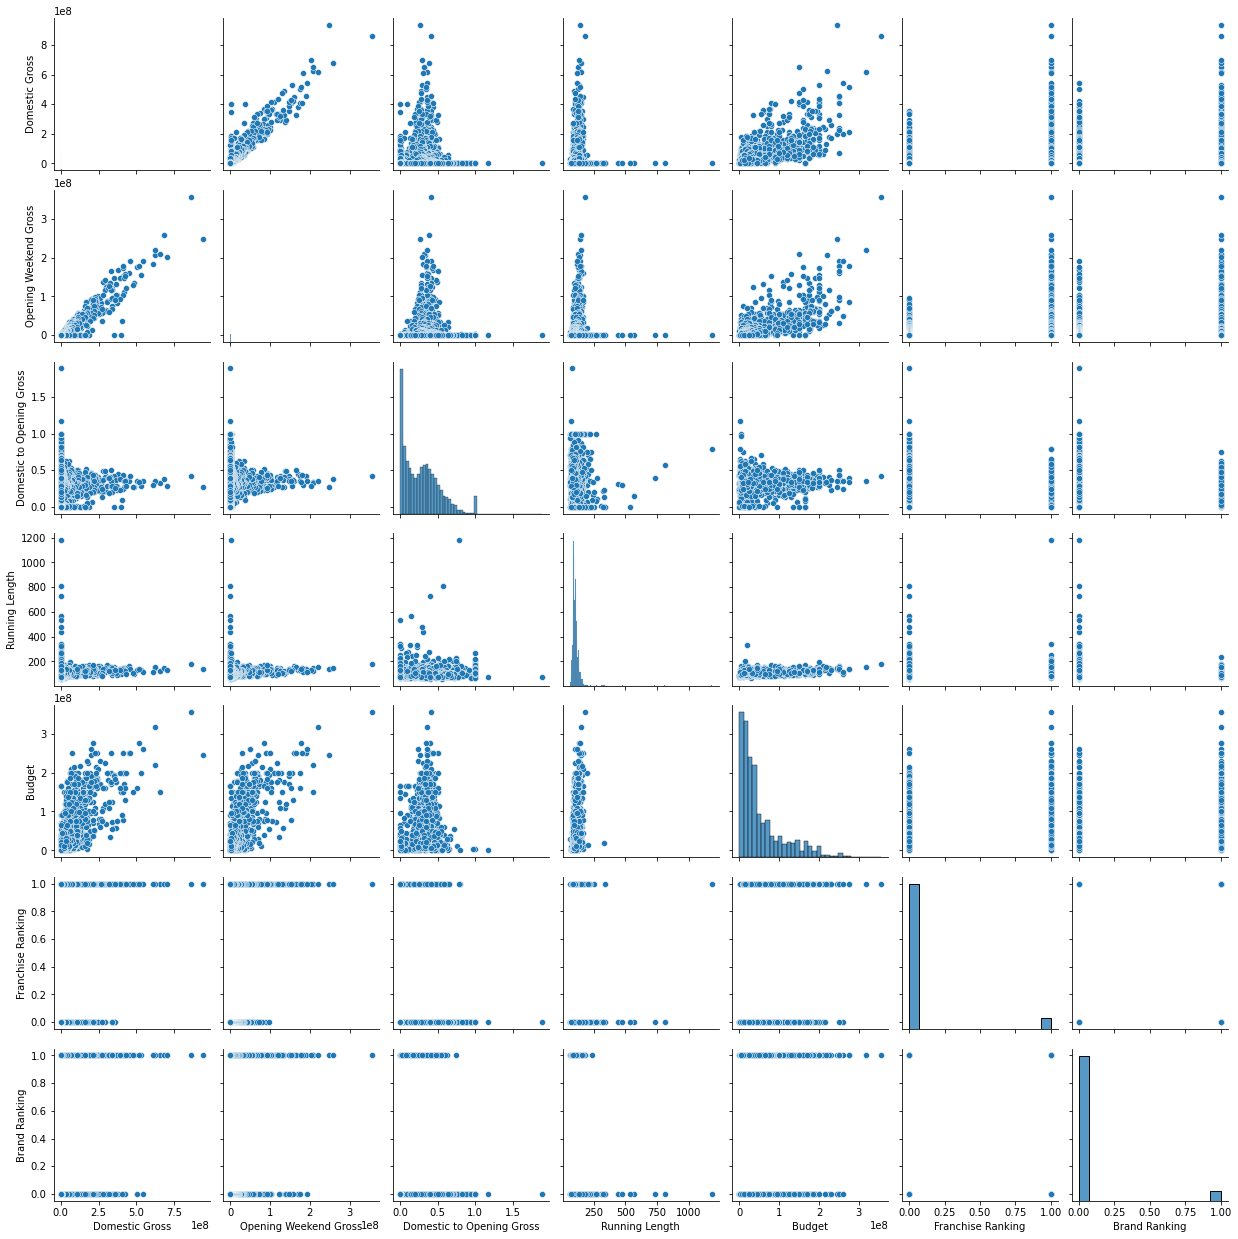

In [311]:
sns.pairplot(df_movies)

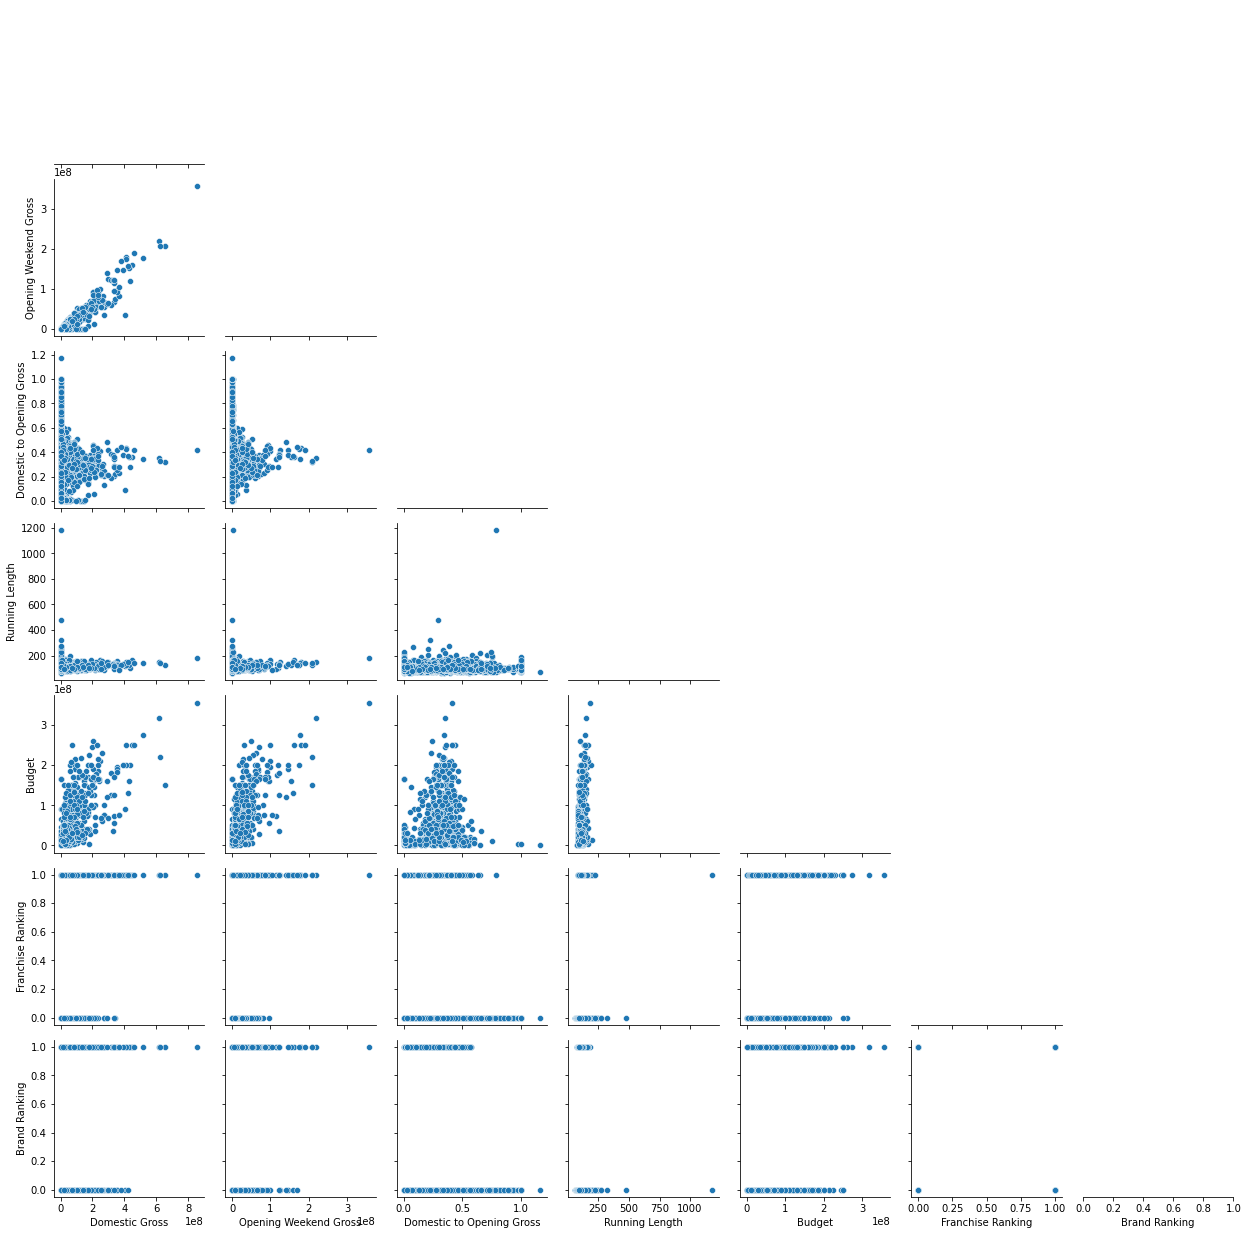

In [312]:
g = sns.PairGrid(df_movies.sample(frac=0.6), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

/home/navish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Budget'>

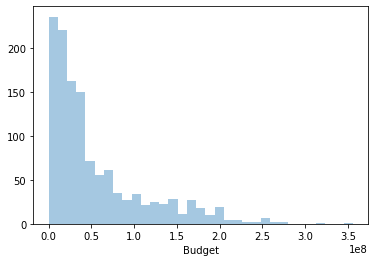

In [328]:
sns.distplot(df_movies[~df_movies.Budget.isna()].Budget,kde=False)


In [16]:
def scrape_imdb_title_links(url):
    """
    Function to scrape IMDB's Title Page for a movie.
    Confirm necessary information was retrieved & return HTML format page.
    
    Input: Title Link (url), that has to be queried
    Output: If successful, tuple containing (True,HTML Page)
            If not successful, tuple containing (False, Error message and if possible, the HTML page)
    """
    
    time.sleep(1+2*random.random())
    try:
        
        response = requests.get(url)
        if response.status_code != 200:
            return (False,"Not able to get results from the page. Received status code {}" \
                    .format(response.status_code))
        
        else:
            soup_title = BeautifulSoup(response.text,'html5lib')
            
            try:
                title_block = soup_title.find('div', class_='title_block')
#                 assert title_block
                return (True,soup_title)
            except Exception as error_message:
                return (False,"Asserting title block gave following error: {}\n Soup Results: \n {}".format(error_message,soup_title))
    except Exception as error_message:
        return (False,"Received error message from overall scraping. {}".format(error_message))

In [398]:
url = 'https://www.imdb.com/title/{}/'
df_imdb_raw = pd.DataFrame(columns=['HTML'])
df_imdb_raw.index.name = 'Title_id'
df_imdb_raw

,HTML
Title_id,


In [ ]:
counter = 1
url = 'https://www.imdb.com/title/{}/'
for row_index,row_series in df_movies[null_values_mask].iterrows():
    title_id = row_series['Title ID']
    print(url.format(title_id))
    result = scrape_imdb_title_links(url.format(title_id))
    budget = np.nan
    soup_title = ''
    
    if result[0]:
        soup_title = result[1]
        try:
            temp = soup_title.find('div', id='titleDetails'). \
                                     find('h4',text=re.compile('Budget')).next_sibling.strip()
            budget = currency_to_int(temp)
            
        except Exception as error_message:
            print("Error getting the budget from HTML. Message is {}".format(error_message))
        
    else:
        print("Error scraping the link or finding the title summary.")
        print(result[1])
        
    df_movies.loc[row_index,'Budget'] = budget
#     df_imdb_raw.loc[title_id,'HTML'] = soup_title


    counter += 1
    
    if counter%25 == 0:
        df_movies.to_csv("Movies_listv3.csv",index=False)
#         df_imdb_raw.to_csv("HTML_IMDB_RAW.csv",index=False)
        time.sleep(20+5*random.random())

df_movies.to_csv("Movies_listv3.csv",index=False)
# df_imdb_raw.to_csv("HTML_IMDB_RAW.csv",index=False)



# imdb_title_soup.find('div', id='titleDetails').find('h4',text=re.compile('Budget')).next_sibling.strip()


https://www.imdb.com/title/tt1407061/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1020938/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1198101/
https://www.imdb.com/title/tt1216487/
https://www.imdb.com/title/tt1343097/
https://www.imdb.com/title/tt1291465/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1573072/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1562859/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1499201/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1438298/
Error getting the budget from HTML. Me

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1512201/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1152840/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1285246/
https://www.imdb.com/title/tt1486190/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1568335/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1483831/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1503774/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1638362/
Error getting the

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1379182/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1339635/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1277936/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1295068/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0756727/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1426320/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1522857/
Error getting the budget from HTML. Message is 'NoneTyp

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0072041/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1247696/
https://www.imdb.com/title/tt1245358/
https://www.imdb.com/title/tt1482991/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0472562/
https://www.imdb.com/title/tt0051852/
https://www.imdb.com/title/tt1549571/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1307861/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/nan/
Error scraping the link or finding the title summary.
Not able to get results from the page. Received status code 404
https://www.imdb.com/title/tt1653827/
Error getting the budge

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1440292/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1442519/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1695793/
https://www.imdb.com/title/tt1884268/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1525838/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1606382/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1885448/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1459012/
Error getting the

Error scraping the link or finding the title summary.
Received error message from overall scraping. HTTPSConnectionPool(host='www.imdb.com', port=443): Max retries exceeded with url: /title/tt1646111/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f702d69e7f0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
https://www.imdb.com/title/tt1523483/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1588170/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1649433/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1670389/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0960730/
Error getting the budget from HTML. Me

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0015648/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1787725/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1340773/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2084773/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1740707/
https://www.imdb.com/title/tt1638979/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1541666/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1645774/
Error getting the

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1258998/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1292648/
https://www.imdb.com/title/tt1590157/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1426371/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1559040/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1503777/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1487118/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1763245/
Error getting the

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1956697/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1981080/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1477855/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1226240/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1753813/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1349451/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2053352/
Error getting the budget from HTML. Message is 'NoneTyp

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1813327/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1703148/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1433207/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2294729/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2309048/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1663660/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1606384/
https://www.imdb.com/title/tt2371411/
https://www.imdb.

https://www.imdb.com/title/tt2062989/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0090107/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1907731/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2007387/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1828229/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1618399/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2014338/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1440379/
Error getting the

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1611990/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1906426/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1922561/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1674775/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1655446/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1989712/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1456941/
https://www.imdb.com/title/tt1525552/
Error getting the

https://www.imdb.com/title/tt1261954/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2120779/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0850677/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1757742/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1810697/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2072987/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1014808/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1034314/
https://www.imdb.

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2243389/
https://www.imdb.com/title/tt1564870/
https://www.imdb.com/title/tt2321163/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1922748/
https://www.imdb.com/title/tt2017038/
https://www.imdb.com/title/tt1736049/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1836808/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1491044/
https://www.imdb.com/title/tt1596753/
https://www.imdb.com/title/tt2304771/
https://www.imdb.com/title/tt2553908/
https://www.imdb.com/title/tt2444946/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1869716/
https://www.imdb.com/

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1047011/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1308756/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1854513/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2332579/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1785612/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2358891/
https://www.imdb.com/title/tt1992193/
https://www.imdb.com/title/tt2094890/
https://www.imdb.com/title/tt1951166/
Error getting the budget from HTML. Message is 'NoneType' object has no attr

https://www.imdb.com/title/tt1540741/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2332522/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0049877/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1634136/
https://www.imdb.com/title/tt2450186/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1655416/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2007360/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1638353/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2018086/
https://www.imdb.com/title/tt1951216/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2132324/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3091552/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2419284/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1790834/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2294917/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2318527/
https://www.imdb.

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2215363/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2401007/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1841713/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1461219/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1745686/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2371824/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1551630/
Error getting the budget from HTML. Message is 'NoneTyp

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2481246/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2385006/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2089674/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2294965/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2083231/
https://www.imdb.com/title/tt2402163/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2736254/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2538654/
Error getting the

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2258345/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0403935/
https://www.imdb.com/title/tt1706620/
https://www.imdb.com/title/tt2265171/
https://www.imdb.com/title/tt2762334/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2714380/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1937390/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2852406/
https://www.imdb.com/title/tt2910814/
https://www.imdb.com/title/tt1562899/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3906444/


Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3283556/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1847746/
https://www.imdb.com/title/tt3812366/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1483324/
https://www.imdb.com/title/tt1196956/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3142232/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2304915/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2359024/
https://www.imdb.com/title/tt2361700/
https://www.imdb.com/title/tt2417560/
Error getting the budget from HTML. Me

https://www.imdb.com/title/tt3326366/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2481480/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1745710/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2320924/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1816518/
https://www.imdb.com/title/tt2187115/
https://www.imdb.com/title/tt2674040/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0115940/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3214002/
Error getting the budget from HTML. Message is 'NoneType' object has no attr

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4137324/
https://www.imdb.com/title/tt2276069/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2405372/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2312406/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2087850/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2530936/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2176786/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3268030/
Error getting the

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2232578/
https://www.imdb.com/title/tt3106846/
https://www.imdb.com/title/tt3119416/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2738050/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2039345/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4047350/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2822400/
https://www.imdb.com/title/tt2277150/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2063819/
Error getting the budget from HTML. Message is 'NoneType' object has no attr

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2361110/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2616594/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1925518/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2387589/
https://www.imdb.com/title/tt2897642/
https://www.imdb.com/title/tt1675759/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2458912/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2385195/
https://www.imdb.com/title/tt2570224/
Error getting the budget from HTML. Message is 'NoneType' object has no attr

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4110568/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4594834/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2140465/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3148502/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3767372/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3442006/
https://www.imdb.com/title/tt1524575/
https://www.imdb.com/title/tt2302966/
https://www.imdb.com/title/tt3464018/
Error getting the budget from HTML. Message is 'NoneType' object has no attr

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4819470/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2884018/
https://www.imdb.com/title/tt3205376/
https://www.imdb.com/title/tt3859076/
https://www.imdb.com/title/tt3062976/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3544082/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3086442/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2452254/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3065132/
Error getting the budget from HTML. Message is 'NoneType' object has no attr

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3399024/
https://www.imdb.com/title/tt3062880/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3742378/
https://www.imdb.com/title/tt2072230/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0044103/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4727756/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4359416/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4185572/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.

https://www.imdb.com/title/tt3993894/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2893490/
https://www.imdb.com/title/tt1745787/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4382872/
https://www.imdb.com/title/tt3997238/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2935564/
https://www.imdb.com/title/tt2841572/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1921149/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2358456/
https://www.imdb.com/title/tt1533089/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3529612/


Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4462082/
https://www.imdb.com/title/tt3302498/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3717068/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2720680/
https://www.imdb.com/title/tt3774466/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3003800/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2788512/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2488778/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2241750/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2249278/
https://www.imdb.com/title/tt3561348/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3962828/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt0867270/
https://www.imdb.com/title/tt1649443/
https://www.imdb.com/title/tt3465916/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2814362/
https://www.imdb.com/title/tt3208008/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4032450/
Error getting the budget from HTML. Me

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1730714/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4692234/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1731701/
https://www.imdb.com/title/tt0074870/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2147225/
https://www.imdb.com/title/tt3946020/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3483194/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2936180/
https://www.imdb.com/title/tt3904754/
Error getting the budget from HTML. Message is 'NoneType' object has no attr

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt5477608/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt1619029/
https://www.imdb.com/title/tt4272866/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4864932/
https://www.imdb.com/title/tt3253232/
https://www.imdb.com/title/tt2800050/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt5596352/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2649554/
https://www.imdb.com/title/tt2910904/
https://www.imdb.com/title/tt5918090/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt3139764/


Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4334482/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4947738/
https://www.imdb.com/title/tt1490785/
https://www.imdb.com/title/tt1714917/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt5576336/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt2368619/
https://www.imdb.com/title/tt3451230/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt5269396/
Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt5275314/
Error getting the budget from HTML. Message is 'NoneType' object has no attr

Error getting the budget from HTML. Message is 'NoneType' object has no attribute 'next_sibling'
https://www.imdb.com/title/tt4048272/
https://www.imdb.com/title/tt4374460/
https://www.imdb.com/title/tt3652862/


In [414]:
df_movies[null_values_mask].iloc[:30,:]

,Release Link,Title,Domestic Gross,Max Theatres,Opening Weekend Gross,Domestic to Opening Gross,Opening Weekend Theatres,Release Date,Studio Link,Studio Name,Title ID,Running Length,Budget,MPAA,Genre,Franchise Ranking,Brand Ranking
1,https://www.boxofficemojo.com//release/rl12485...,Harry Potter and the Deathly Hallows: Part 1,295983305,4125,125017372,0.422,4125,Nov 19 2010,https://pro.imdb.com/company/co0002663/boxoffi...,Warner Bros.,tt0926084,146,225000000,[PG-13],"[Adventure, Family, Fantasy, Mystery]",1.0,0.0
78,https://www.boxofficemojo.com//release/rl35478...,When in Rome,32680633,2456,12350041,0.378,2456,Jan 29 2010,https://pro.imdb.com/company/co0226183/boxoffi...,Walt Disney Studios Motion Pictures,tt1185416,91,55000000,[PG-13],"[Comedy, Romance]",0.0,0.0
79,https://www.boxofficemojo.com//release/rl51010...,Devil,33601190,2811,12289375,0.366,2809,Sep 17 2010,https://pro.imdb.com/company/co0005073/boxoffi...,Universal Pictures,tt1314655,80,10000000,[PG-13],"[Horror, Mystery, Thriller]",0.0,0.0
95,https://www.boxofficemojo.com//release/rl19338...,Alpha and Omega,25107267,2625,9106906,0.363,2625,Sep 17 2010,https://pro.imdb.com/company/co0173285/boxoffi...,Lionsgate,tt1213012,90,20000000,[PG],"[Adventure, Animation, Comedy, Family, Romance]",0.0,0.0
100,https://www.boxofficemojo.com//release/rl40997...,Just Wright,21540363,1831,8284989,0.385,1831,May 14 2010,https://pro.imdb.com/company/co0028932/boxoffi...,Fox Searchlight Pictures,tt1407061,101,NaN,[PG],"[Comedy, Romance, Sport]",0.0,0.0
104,https://www.boxofficemojo.com//release/rl27535...,Our Family Wedding,20255281,1609,7629862,0.377,1605,Mar 12 2010,https://pro.imdb.com/company/co0028932/boxoffi...,Fox Searchlight Pictures,tt1305583,103,14000000,[PG-13],"[Comedy, Romance]",0.0,0.0
119,https://www.boxofficemojo.com//release/rl20588...,Babies,7320323,543,2160460,0.295,534,May 7 2010,https://pro.imdb.com/company/co0042399/boxoffi...,Focus Features,tt1020938,79,NaN,[PG],[Documentary],0.0,0.0
121,https://www.boxofficemojo.com//release/rl28754...,My Name Is Khan,4018771,125,1944027,0.484,120,Feb 12 2010,https://pro.imdb.com/company/co0028932/boxoffi...,Fox Searchlight Pictures,tt1188996,165,12000000,[PG-13],[Drama],0.0,0.0
126,https://www.boxofficemojo.com//release/rl22877...,Kites,1643486,207,959329,0.584,207,May 21 2010,https://pro.imdb.com/company/co0261932/boxoffi...,Reliance Big Pictures,tt1198101,123,None,NaN,"[Action, Drama, Romance, Thriller]",0.0,0.0
127,https://www.boxofficemojo.com//release/rl72648...,The Girl Who Played with Fire,7638241,185,904998,0.118,108,Jul 9 2010,https://pro.imdb.com/company/co0235025/boxoffi...,Music Box Films,tt1216487,129,None,[R],"[Crime, Drama, Mystery, Thriller]",1.0,0.0


## For reference - if needed
### Title Page Scraping Below

In [11]:
# https://www.boxofficemojo.com/title/tt4154796/credits/?ref_=bo_tt_tab#tabs
    
url = "https://www.boxofficemojo.com/title/{}/credits/?ref_=bo_tt_tab#tabs"

title_id = "tt4154796"

response = requests.get(url.format(title_id))

soup_release = BeautifulSoup(response.text,'html5lib')
soup.prettify()

'<!DOCTYPE html>\n<html class="a-no-js" data-19ax5a9jf="dingo">\n <head>\n  <script>\n   var aPageStart = (new Date()).getTime();\n  </script>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>\n  <meta charset="utf-8"/>\n  <title dir="ltr">\n   Avengers: Endgame - Box Office Mojo\n  </title>\n  <meta content="Avengers: Endgame" name="title"/>\n  <meta content="Box Office Mojo" property="og:site_name"/>\n  <meta content="telephone=no" name="format-detection"/>\n  <link href="https://m.media-amazon.com/images/G/01/boxofficemojo/v2/favicon._CB448965889_.ico" rel="icon" type="image/x-icon"/>\n  <link href="https://images-na.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,51AZ-Jz5kmL.css,51IB+wfP8qL.css,01evdoiemkL.css,01K+Ps1DeEL.css,01Vctty9pOL.css,314djKvMsUL.css,01ZTetsDh7L.css,11cMnOipjJL.css,01pbA9Lg3yL.css,21LK7jaicML.css,11L58Qpo0GL.css,21kyTi1FabL.css,01ruG+gDPFL.css,01YhS3Cs-hL.css,21GwE3cR-yL.css,11KLBtpWIAL.css,1